<h2><b style="color:teal"> Welcome to the FamInsureCo Python Case Study! </b></h2>

<img src = https://iiflinsurance.com/images/health-insurance.jpg>

While working on the Statistics unit, you used Microsoft Excel's data analytics capabilities to analyze FamInsureCo's Data

You might have realised that whilst Excel is powerful, it was a bit tricky creating Box Plots, multiple line plots and in general, doing quick analysis in Excel. You had to use a lot of filters to subset the data, which, then provided your charts were linked, created a number of issues with your other visuals.

In this Case Study, we're going to *revisit* the FamInsureCo Case Study, but with a few added questions that will really emphasise how Python can speed up our analysis and improve our data visualisation capabilities! 


**Please note that this case study is composed of two parts** — once you have completed part 1, which involves descriptive statistics, please submit your work and discuss it with your mentor <u>before</u> moving on to part 2. 

Let's get started! 

<h2><b style="color:teal">Descriptive Statistics</b></h2>

### Step 1: <span style="color:teal">Import Libraries</span> 

Import the libraries you'll need for your analysis. You will need the following libraries: 

**Matplotlib** - This is Python's basic plotting library.
You'll use the pyplot and dates function collections from matplotlib throughout this case study so we encourage you to important these two specific libraries with their own aliases. 

**Seaborn** - This library will enable you to create aesthetically pleasing plots.

**Pandas** - This library will enable you to view and manipulate your data in a tabular format.

**statsmodels.api** - This library will enable you to create statistical models. You will need this library when performing regession analysis in Part 2 of this case study.

Please note we've included the `mpl.rcParams['figure'figsize']` code for you.

This code controls how big your charts will be with the syntax of (X,Y) where X represents the X Axis and Y, the Y Axis.

<h2><b style="color:salmon"> Place your code here </b> </h2>

In [128]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)


### Step 2: <span style="color:teal">Descriptive Statistics</span> 
The data you'll need to complete the FamInsureCo Case Study is stored in the `.csv` file titled; `FamInsureCo.csv`.

<b> Please complete the following below: </b>

i. Import the `FamInsureCo.csv` dataset and store this in a dataframe titled, `FamInsureCo_Data`. 

ii. Referencing the `FamInsureCo_Data dataframe` you created, use the `.describe()` method to print out the Summary Statistics for the dataframe.

What do you observe? 

<h2><b style="color:salmon"> Place your code here </b> </h2>

In [129]:
faminsureco_data = pd.read_csv("faminsureco.csv")

In [130]:
faminsureco_data.describe()

,age,bmi,medical_insurance_charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422414
std,14.049960,6.098187,12110.011240
min,18.000000,15.960000,1121.870000
25%,27.000000,26.296250,4740.287500
50%,39.000000,30.400000,9382.030000
75%,51.000000,34.693750,16639.915000
max,64.000000,53.130000,63770.430000


### Step 3: <span style="color:teal">Create a Single Scatter Plot </span> 

Previously, when we kicked off our analysis in Excel, we started with some Scatter Plots.

As a quick refresher, scatter plots are a useful way to compare two variables and determining whether any relationship might exist between them. We've included an example below of what this looks like to jog your memory.

<img src = "https://seaborn.pydata.org/_images/scatterplot_3_0.png"> 

i) Create a Scatter Plot highlighting the Medical Insurance Costs (Y-Axis) against the Body mass Index (X-Axis) using the `FamInsureCo` dataframe you created earlier. 

<b> Hint: You might find <a href = "https://seaborn.pydata.org/generated/seaborn.scatterplot.html"> this</a> link helpful! </b>

<h2><b style="color:salmon"> Place your code here </b> </h2>


[Text(0.5, 1.0, 'Medical Insurance vs BMI')]

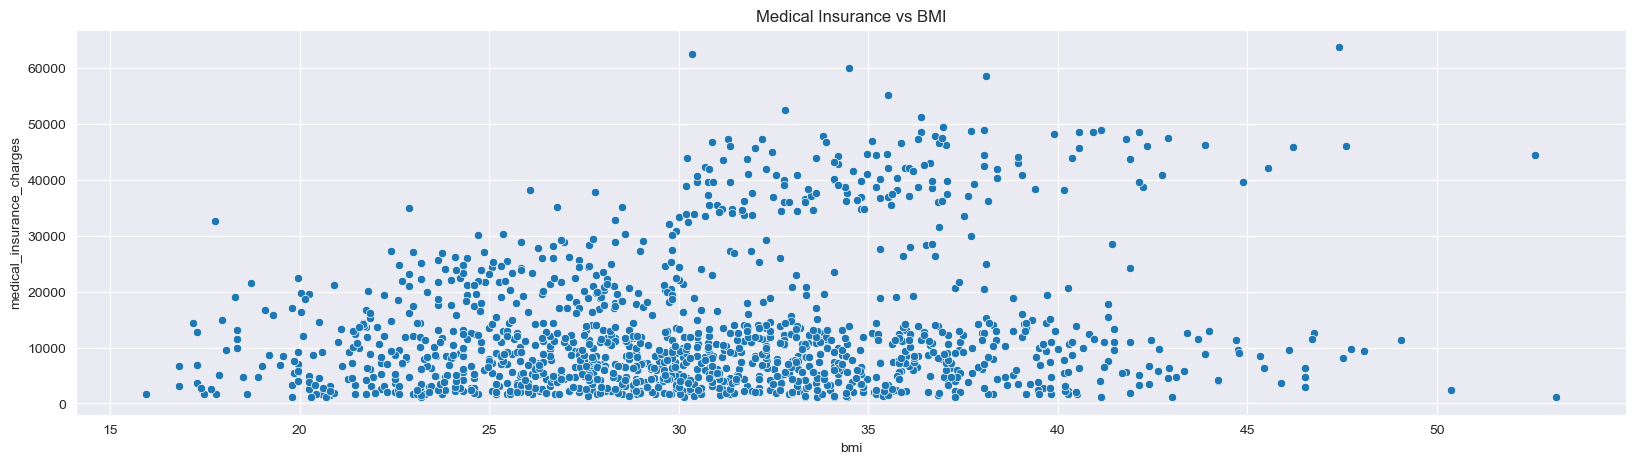

In [131]:
sns.scatterplot(x="bmi", y="medical_insurance_charges", data=faminsureco_data).set(title="Medical Insurance vs BMI")

### Step 4: <span style="color:teal"> Multiple Classifications in a Scatter Plot</span> 


Previously, you would have recalled how you had to create a 'hacky' workaround to get multiple colors displaying for the BMI vs Medical Charges vs. Weight Classification Scatter Plot.

Now this is one of the challenges with Excel; if you want to color code your chart based off textual information, you're going to have to <b> manually </b> identify each range that applies for said textual category, and then input this in your Excel Chart.

In the next question, we're going to simplify this process dramatically through the Power of Python.

You'll tackle this question over two small steps.

i) Create a new column titled `BMI_Classification` that makes use of `IF THEN Logic` to match the below criteria: 

    A) BMI < 18.5: Underweight
    B) BMI > 18.5 and <= 24.9: Healthy
    C) BMI > 24.9 and <= 29.9: Slightly Overweight
    D) BMI > 30: Overweight

<b> Hint: This <a href = "https://blog.hubspot.com/website/pandas-if-else"> resource </a> will be helpful! </b>

If you're still stuck, take a look at this SO link <a href = "https://stackoverflow.com/questions/49228596/pandas-case-when-default-in-pandas"> here</a>! 

2. Upon completion of this logic, create a Scatter Plot that uses the `BMI_Classification` Column as the `hue` for your Scatter Plot.

We've included an example below to show-case how this syntax works:

~~~
seaborn.scatterplot(data=dataframe, x=dataframe['ColA'], y=dataframe['ColB'], 
hue=Textual_Criteria) 
 
plt.show()
~~~ 


In [132]:
faminsureco_data["bmi_classification"]= np.select([faminsureco_data["bmi"].between(0,18.5),
                                                  faminsureco_data["bmi"].between(18.51,24.9),
                                                  faminsureco_data["bmi"].between(24.91,29.99),
                                                  faminsureco_data["bmi"].between(30,60)],["Underweight","Healthy", "Slightly Overweight", "Overweight"])

[Text(0.5, 1.0, 'Medical Insurance vs BMI Weight Classification')]

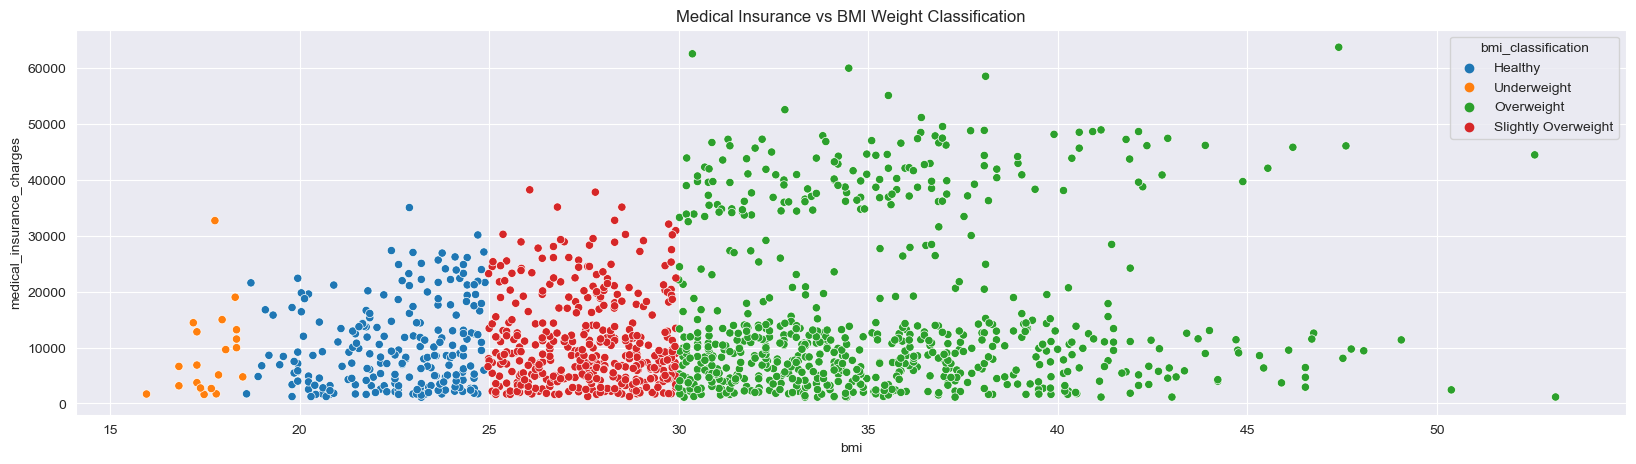

In [133]:
sns.scatterplot(
    x="bmi",
    y="medical_insurance_charges",
    data=faminsureco_data,
    hue="bmi_classification").set(title="Medical Insurance vs BMI Weight Classification")

<h2><b style="color:salmon"> Place your code here </b> </h2>

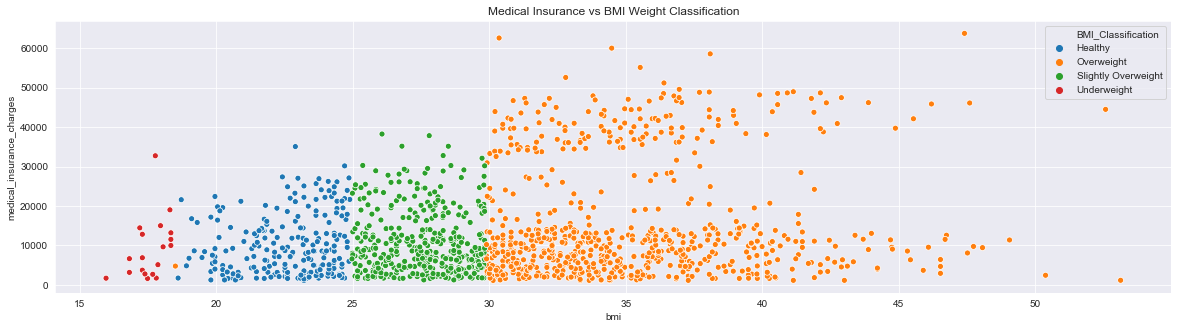

### Step 5: <span style="color:teal"> Segmentation by Smoker Status</span> 


Now we may recall that we happened to see a particularly interesting observation when we filtered our data on `smoking status`. We saw costs uptick for a certain subset of our population - namely our Smokers.

As you work through Python, it's important you understand how to `subset` your pandas dataframes.
You've covered this in the datacamp material previously (Manipulating Dataframes with Pandas).

We'll have you implement the knowledge you've learned in the below questions!
If you're stuck, take a look at our Syntax refresher below:

    conditionA = dataframe['ColOfInterest'] == 'SomeString' 
    #This means that conditionA is going to return a list of True and False entries, where True matches the textual string, 'SomeString'
    
    Next, we need to subset the dataframe to include only the 'SomeString' Values.
    dataframe[conditionA]
    That's it!
    
 

In [134]:
smoker_y = faminsureco_data["smoker"] == "yes"
smoker_n = faminsureco_data["smoker"] == "no"

In [135]:
faminsureco_data[smoker_n]

,age,sex,bmi,smoker,region,medical_insurance_charges,bmi_classification
0,18,female,20.790,no,southeast,1607.51,Healthy
1,18,female,24.090,no,southeast,2201.10,Healthy
2,19,female,24.700,no,southwest,1737.38,Healthy
3,19,female,24.510,no,northwest,2709.11,Healthy
4,19,female,22.515,no,northwest,2117.34,Healthy
...,...,...,...,...,...,...,...
1059,23,male,17.385,no,northwest,2775.19,Underweight
1060,26,male,17.670,no,northwest,2680.95,Underweight
1061,35,male,17.860,no,northwest,5116.50,Underweight
1062,38,male,16.815,no,northeast,6640.54,Underweight


Create two scatter plots:

A) Where the `Smoker Status = yes`, create a Scatter Plot color coded by Smoker Status (hue), with BMI on the X-Axis and Medical Charges on the Y-Axis.
        
B) Where the `Smoker Status = yes`, create a Scatter Plot color coded by Smoker Status (hue), with BMI on the X-Axis and Medical Charges on the Y-Axis.
        
    


[Text(0.5, 1.0, 'Medical Insurance vs BMI Weight Classification vs Smoker Status')]

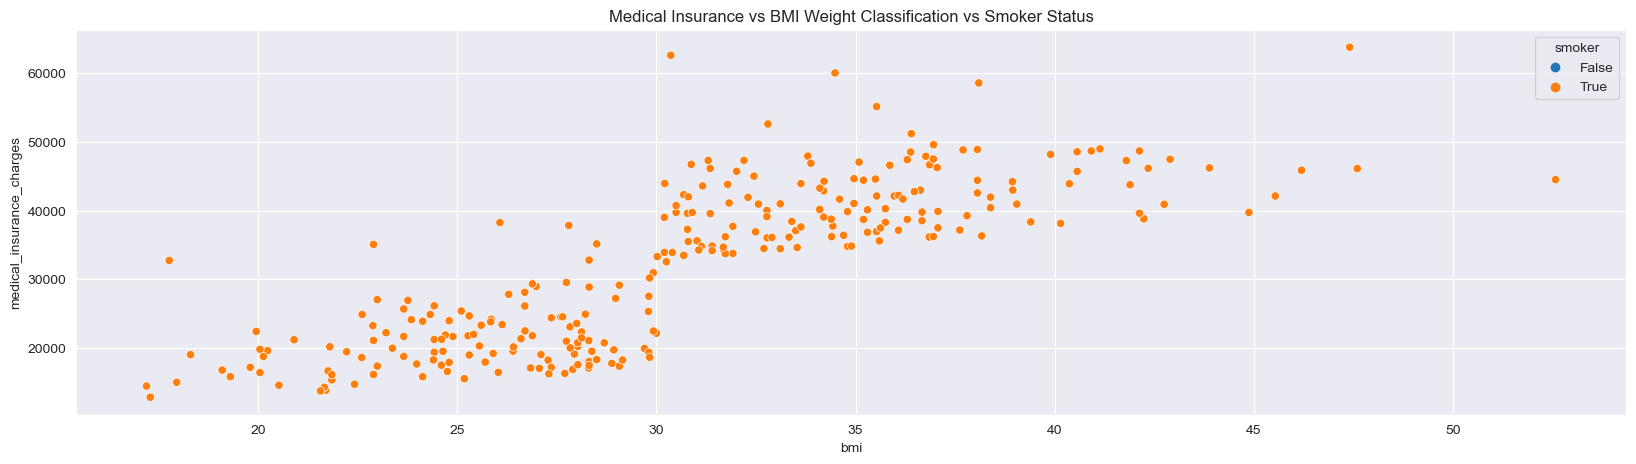

In [136]:
sns.scatterplot(data=faminsureco_data[smoker_y], x="bmi", y="medical_insurance_charges",
                hue=smoker_y).set(title="Medical Insurance vs BMI Weight Classification vs Smoker Status")

[Text(0.5, 1.0, 'Medical Insurance vs BMI Weight Classification vs Smoker Status')]

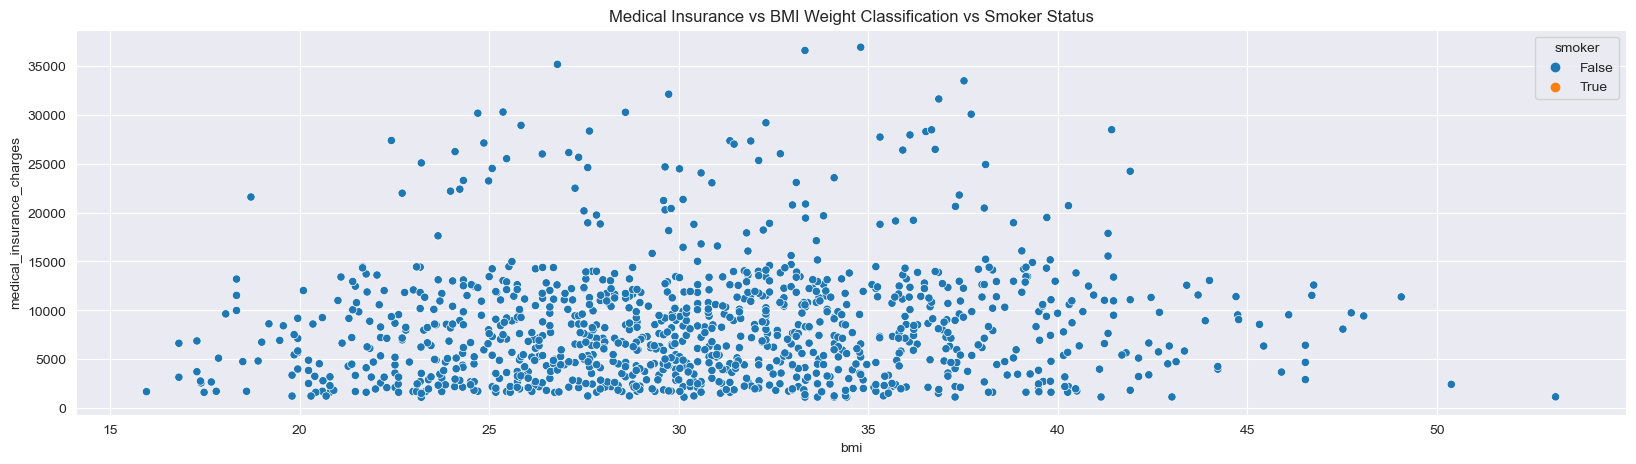

In [86]:
sns.scatterplot(data=faminsureco_data[smoker_n], x="bmi", y="medical_insurance_charges",
                hue=smoker_y).set(title="Medical Insurance vs BMI Weight Classification vs Smoker Status")

<h2><b style="color:salmon"> Place your code here </b> </h2>

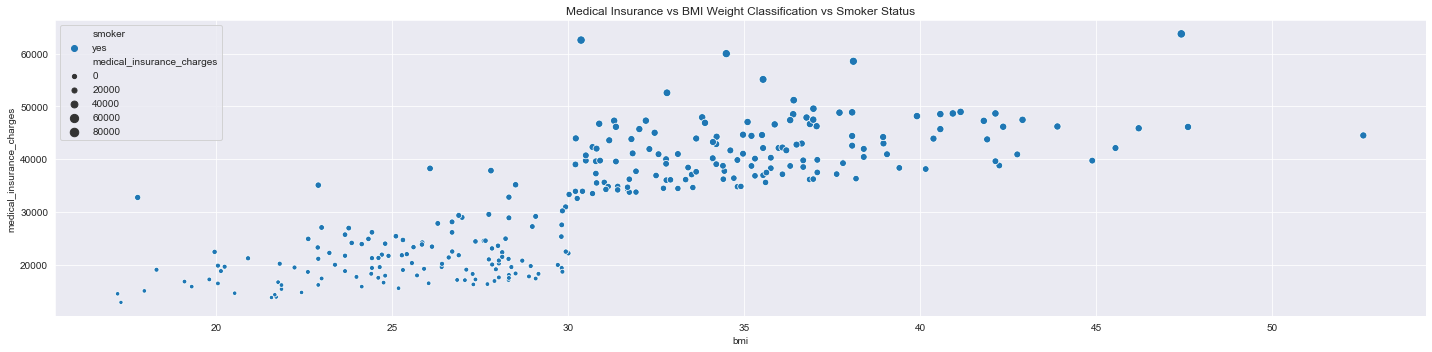

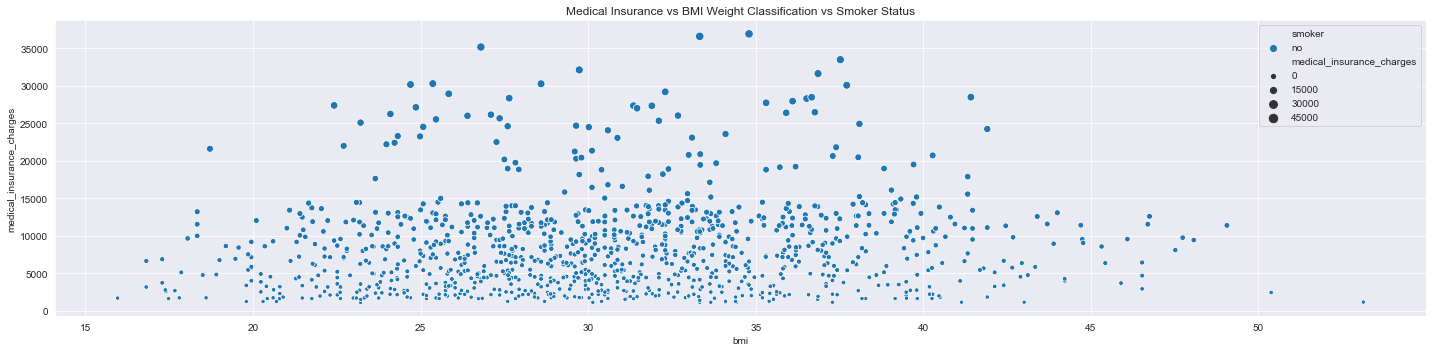

<b> What do you observe across all the visualisations?</b>

### Step 6: <span style="color:teal"> Box Plots </span> 

Now you might recall that we had created some Box Plot visualisations in Excel.
These were a little frustrating due to the filters in Excel that would impact your linked charts.


Thankfully, Python, and subsequently, `seaborn` make creating box plots much easier.

We've included an example of the syntax you'll need to recall over <a href = "https://seaborn.pydata.org/generated/seaborn.boxplot.html"> here</a>.

Please create: 

<b> i) A Box Plot showcasing the spread of Medical Insurance Costs versus Region with the hue set to Smoker Column. </b>

[Text(0.5, 1.0, 'Medical Insurance Costs vs Region')]

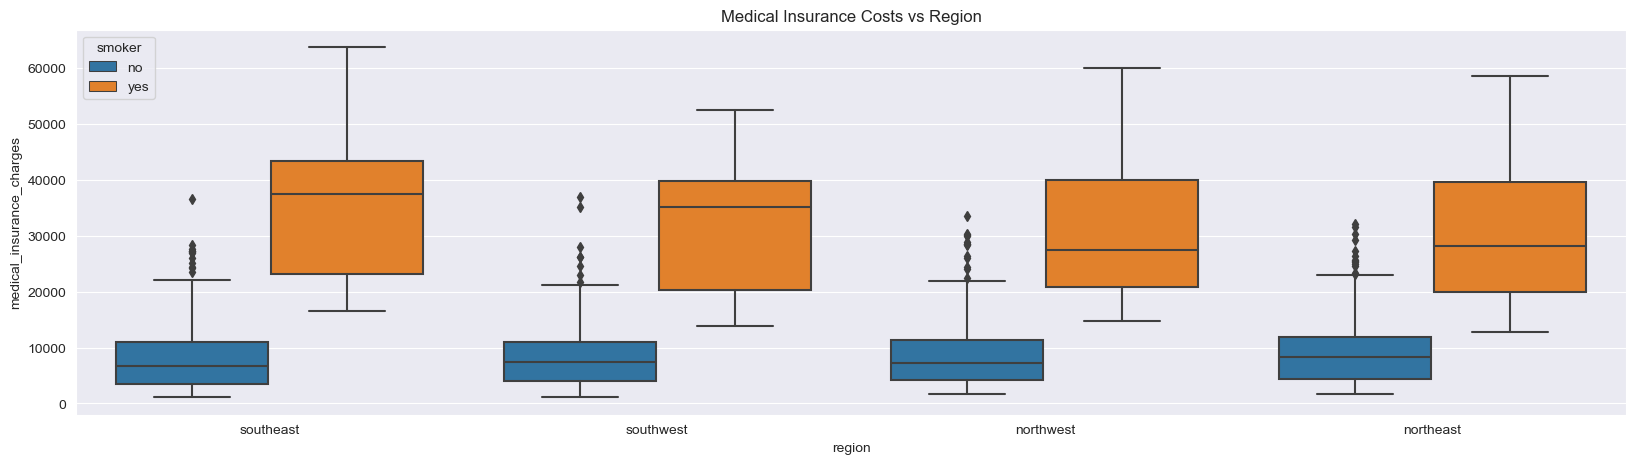

In [137]:
sns.boxplot(data=faminsureco_data, x="region", y="medical_insurance_charges",
            hue="smoker").set(title="Medical Insurance Costs vs Region")

<h2><b style="color:salmon"> Place your code here </b> </h2>

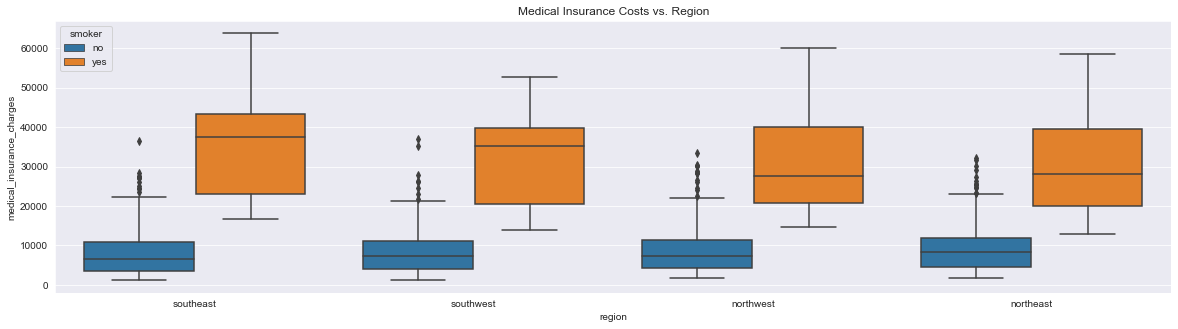

### Step 7: <span style="color:teal"> Visualisations by Age </span> 

Now it's important that we're able to effectively visualise our population and the respective age profiles. 

Could there be an apparent relationship between an individuals age profile and their medical charges?

We might assume yes, but let's visualise this with some histograms!

Below is an example of a Histogram, segmented by penguin species. 🐧

<img src = https://seaborn.pydata.org/_images/histplot_13_0.png>

We won't be segmenting our data by 🐧, but rather, by Age Profile!

i) Create a new column, `Age Classification` in your `FamInsureCo` dataframe using the `age` column, that classifies the data into the following criteria:

    0 - 18 = Youth (Note; This is not inclusive of 18 in this range)
    18 - 25 = Young Adult	
    25 - 35 = Adult	
    35 - 60 = Mature Age Adult	
    >=60	Senior

<b> Hint: You'll do the same thing you did in Step 4! Look back at this <a href = "https://blog.hubspot.com/website/pandas-if-else"> resource </a> if you're stuck! </b>
    
ii) Upon completion of this, create 5 Histograms </b>, one for each of the different `Age Classifications` where the X argument is set to `medical_insurance_charges`


In [138]:
faminsureco_data["age_classification"]= np.select([faminsureco_data["age"].between(0,18),
                                                  faminsureco_data["age"].between(18,25),
                                                  faminsureco_data["age"].between(25,35),
                                                  faminsureco_data["age"].between(35,60),
                                                  faminsureco_data["age"].between(60,100)],
                                                  ["Youth","Young Adult", "Adult", "Mature Age Adult", "Senior"])

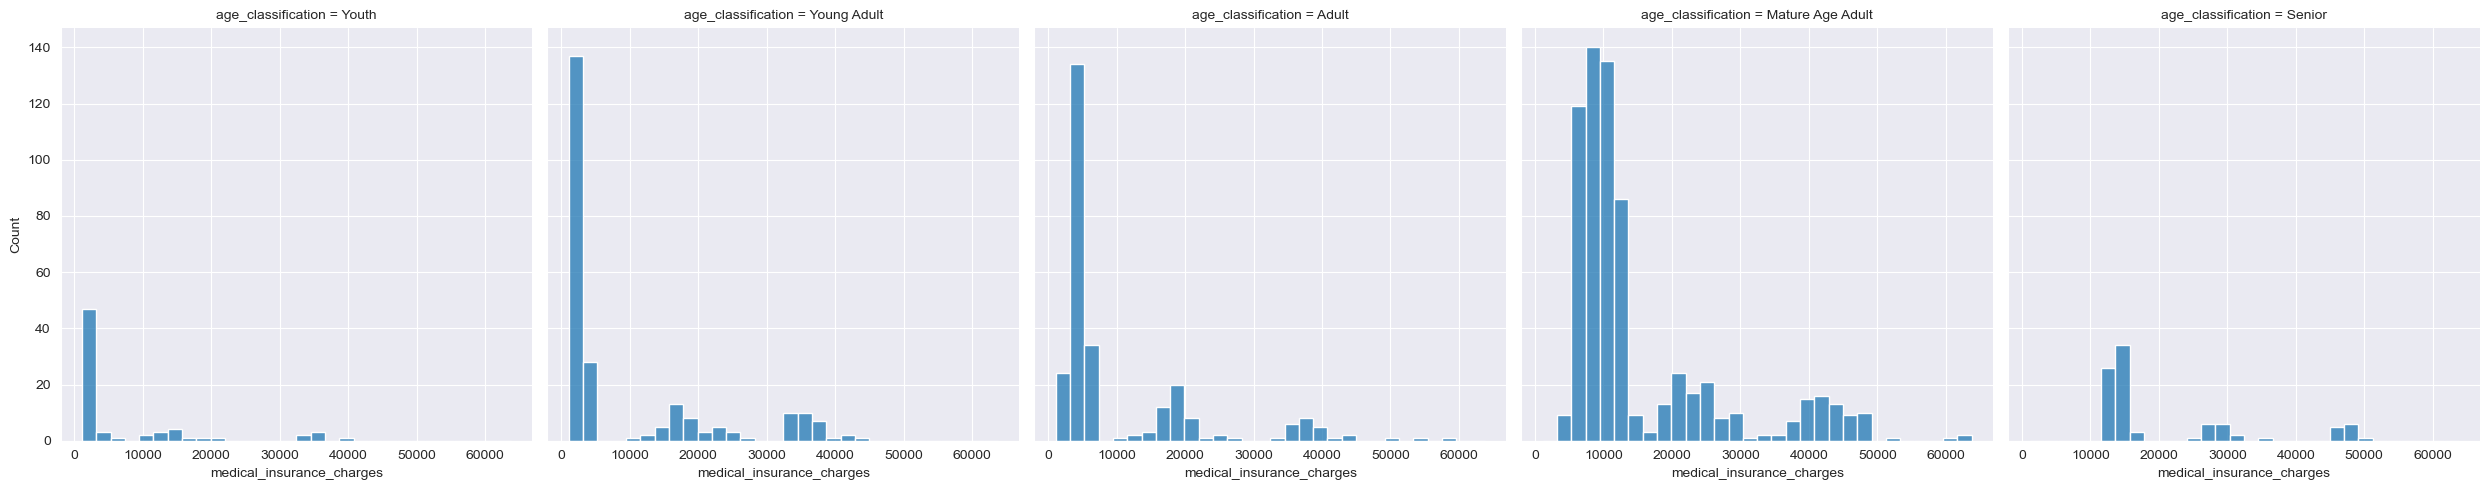

In [139]:
sns.displot(data=faminsureco_data, x="medical_insurance_charges", col="age_classification")

<h2><b style="color:salmon"> Place your code here </b> </h2>

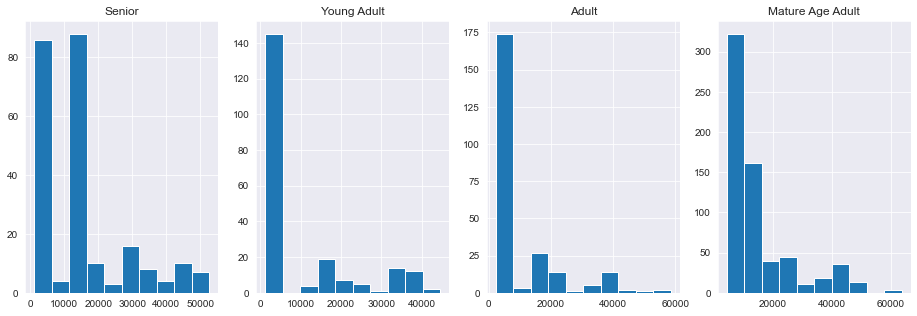

<b> What do you observe across all the visualisations?</b>

iii) Now we know that our Histogram might appear a bit misleading as we haven't accounted for the smoker status profile.

<b>Filter the FamInsureCo Dataframe by Smoking Status and create two sets of histograms, one where the smoker status = yes, and one where the Smoking Status = No. </b>

Do we observe any differences?


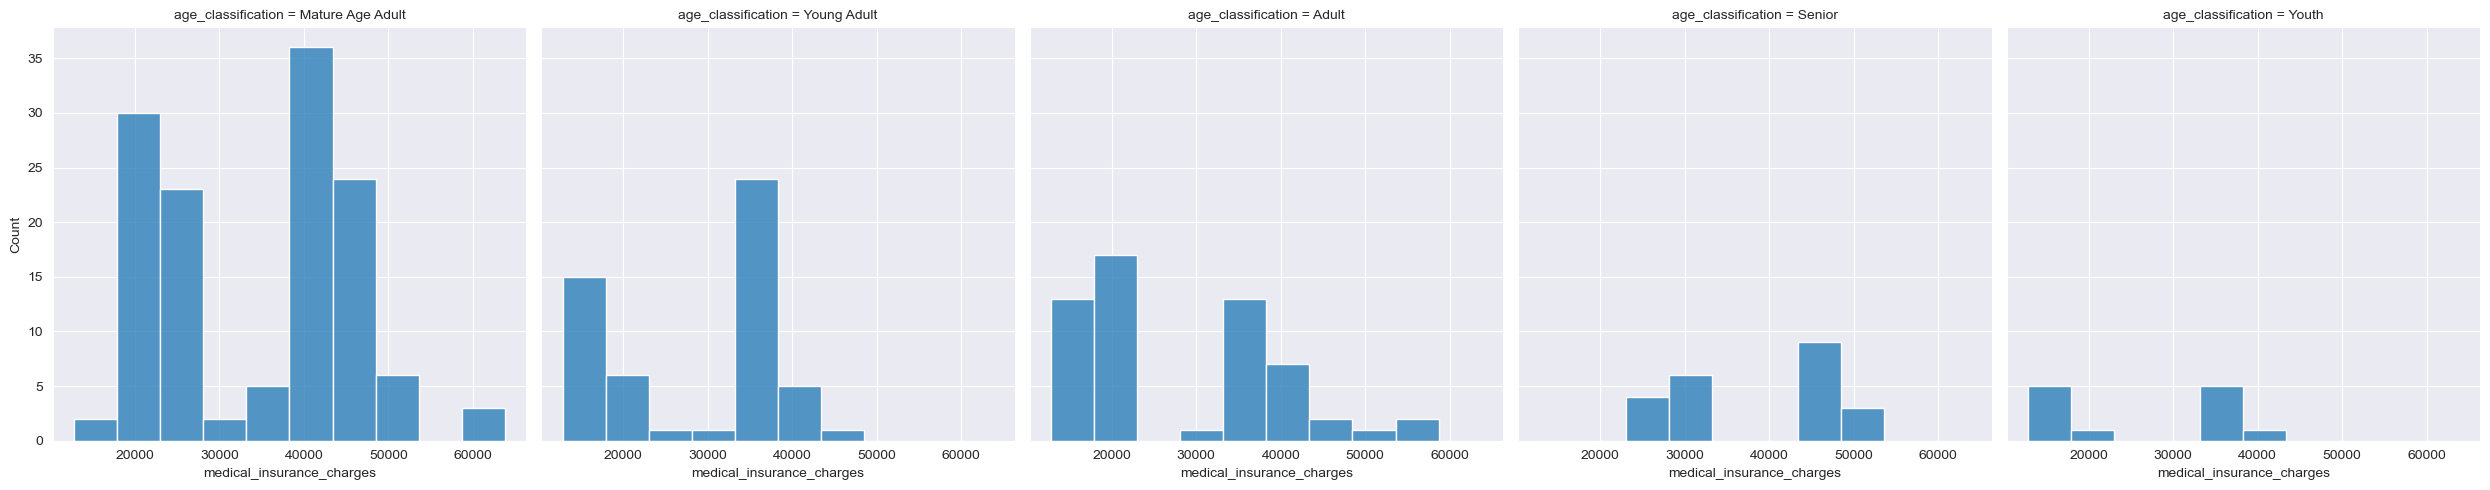

In [140]:
sns.displot(data=faminsureco_data[smoker_y], x="medical_insurance_charges", col="age_classification")

<h2><b style="color:salmon"> Place your code here for where the Smoker = Yes</b> </h2>

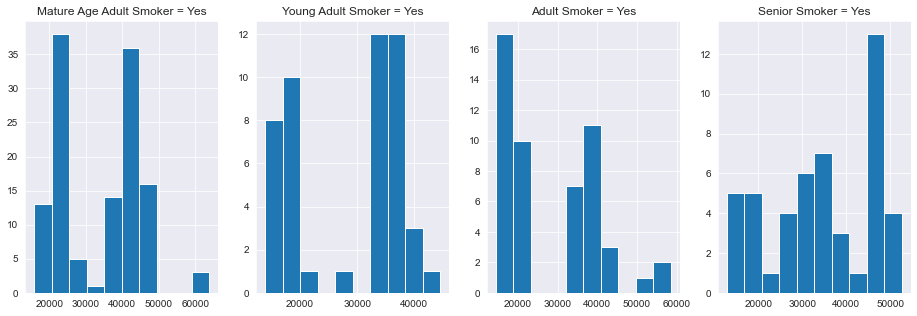

<b> What do you observe across all the visualisations?</b>

<h2><b style="color:salmon"> Place your code here for where the Smoker = No </b> </h2>

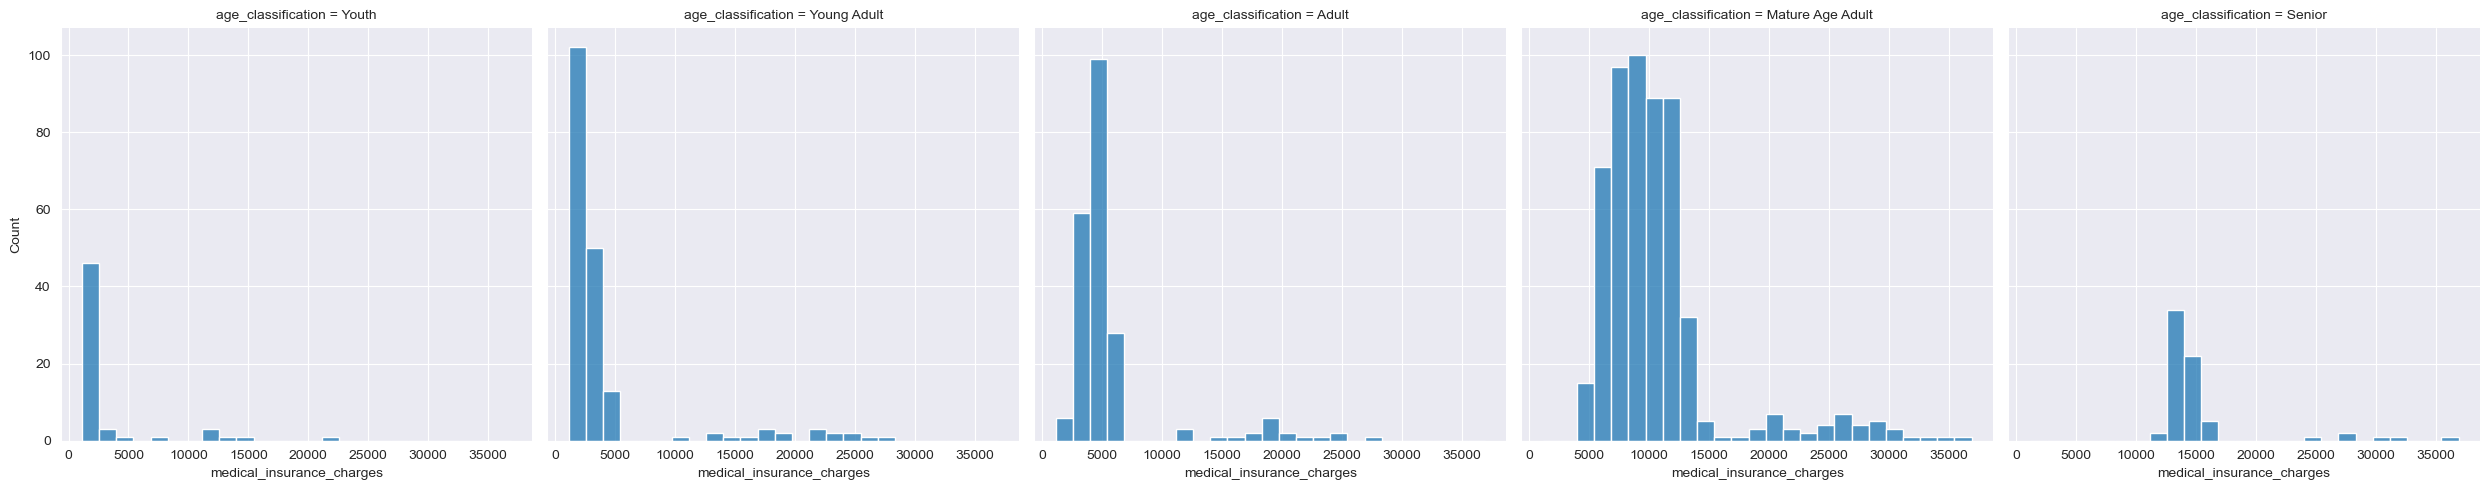

In [141]:
sns.displot(data=faminsureco_data[smoker_n], x="medical_insurance_charges", col="age_classification")

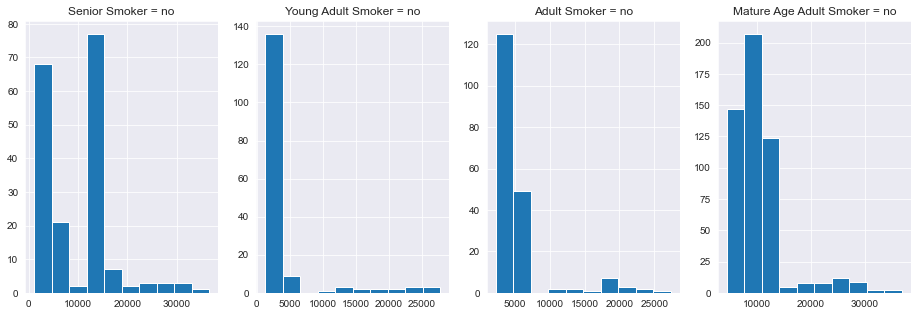

<b> What do you observe across all the visualisations?</b>

### Step 8: <span style="color:teal"> Segmentation by Gender (Sex) </span> 

Now we know that there appears to be a Hypotheses that one of the two sexes, may have higher medical insurance costs.

However, we know that this isn't isolated only to gender.

Smoking Status obviously has a larger role to play here

<b>Create a Box Plot where the `hue` is set to `smoker` with the X-Axis set to Gender (`i.e. sex`). What do you observe? </b>



<Axes: xlabel='sex', ylabel='medical_insurance_charges'>

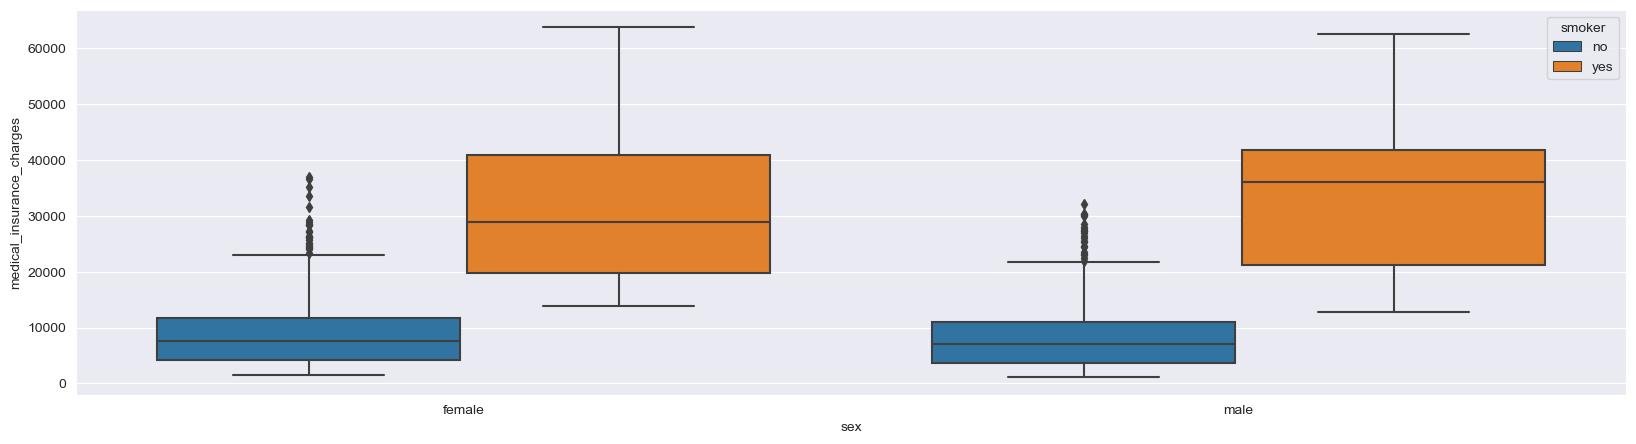

In [142]:
sns.boxplot(data=faminsureco_data, x="sex", y="medical_insurance_charges", hue="smoker")

<h2><b style="color:salmon"> Place your code here </b> </h2>

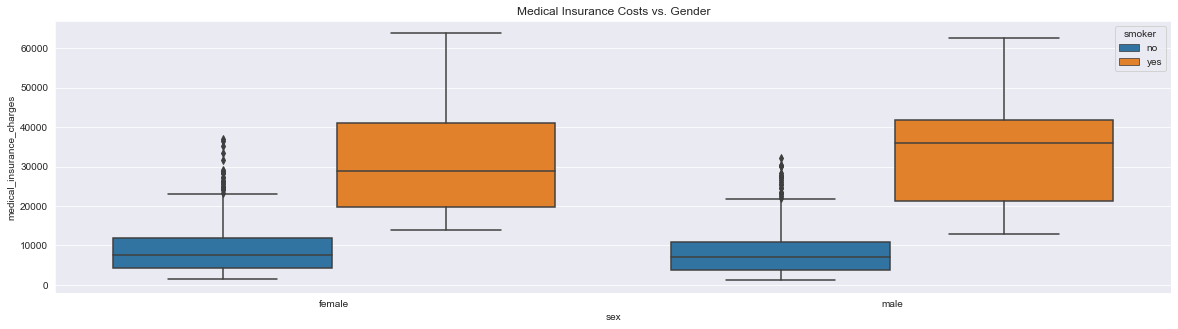

<b> What do you observe across all the visualisations?</b>

<h3> <span style="color:orange"> Please note that Step 9 and 10 are Challenge Questions and will intentionally be more difficult </h3> 

### Step 9: <span style="color:teal"> Create Quartiles</span> 

Now we haven't done any particular treatments to our data analysis.
In our case, we might have <b> Outliers </b> in our Medical Insurance Charges that can skew our dataset.

We're going to be looking at fitting a `regression model` later in our Inferential Statistics Analysis, but before that, it's important we treat our data and ensure we remove our Outliers. Take a look at the image below; you should be able to clearly identify the data point that is different from the rest. 

If you were to take the average including that data point, the average would be inflated, when in fact that data point isn't representative of the series. Generally, we would remove Outliers to ensure we have a representative population mean, or, use the median.

Now let's see what happens if we are to remove our Outliers.

<img src = https://images.ctfassets.net/kj4bmrik9d6o/cESitsCxzL2ijivbNwiW6/de9421d4c144e5a5c23c35941931c83f/Outlier_Graph_CalculateOutlierFormula-01.png>

To do this, we'll have you perform the below:

Create two new variables called `Q1 and Q3` using the `FamInsureCo` Dataframe, focusing specifically on the <b> medical insurance charges </b> column. 

<b> i) Q1 should contain the 25th percentile for all columns in the dataframe while Q3 should contain the 75th percentile for all the columns in the dataframe. </b>

You may want to use the .quantile() function explained <a href = https://www.geeksforgeeks.org/python-pandas-dataframe-quantile/> here </a> 

<b>ii) After defining Q1 and Q3, calculate the interquartile range **(IQR = Q3 - Q1)** for all columns in the dataframe and print it to the screen.</b>

We've included a sample of the IQR output below for your reference!

In [143]:
Q1=np.quantile(faminsureco_data["medical_insurance_charges"],0.25)
Q3=np.quantile(faminsureco_data["medical_insurance_charges"],0.75)
IQR=Q3-Q1
IQR

11899.6275

<h2><b style="color:salmon"> Place your code here </b> </h2>

The general logic for removing an outliers is:

<b> Any Value that is either Q1 - 1.5x IQR or greater than Q3 + 1.5x IQR is considered an outlier. </b>

Where Q1 = Quartile 1 and Q3 = Quartile 3

Let's break these down to a few simple steps and tackle how to calculate this.

1. Define the Quartiles Q1 and Q3. 
2. Calculate the Interquartile Range (Q3 - Q1)
3. Create two new variables; Lower_Range (Q1 - 1.5x IQR) and Upper_Range ( Q3 + 1.5x IQR).
4. Using Boolean Subsetting, filter the Dataframe for Outliers and remove them
5. Calculate what the proportion of Outliers exist (i.e. Number of entries left after Outlier removal / Number of total entries in dataset) 


### Step 10: <span style="color:teal"> Identify & Remove Outliers</span> 

Continuing in from Step 9 - we still need to calculate <b>how</b> we can remove our outliers.

We're aware of the overall formula as shown per below.

<b> Outlier = Q1 - 1.5x IQR OR Q3 + 1.5x IQR </b>

Now let's work out how we can identify these Outliers step by step. 

<b> i) Define two new variables, Lower_Limit and Upper_Limit can be calculated as:</b>
<p>
<li> Lower_Limit = Q1 - 1.5 * IQR </li>
<li> Upper_Limit = Q3 + 1.5 * IQR </li> 
   
<b> ii) Using Lower_Limit and Upper_Limit with an OR (|) condition, filter the dataframe to include *only* the Outliers. How many Outliers do we have?</b>
    
<b>Now note that we only want to use the *upper limit* for our filtering. 
This is because the lower limit has us retrieve -ve medical insurance charges, which isn't valid. </b>

What this means is that the syntax should look like this:
    
    FamInsureCoOutliers = some_dataframe [ (some_dataframe > Upper_Limit)] 
    
If you're stuck, <a href = https://stackoverflow.com/questions/54398554/how-to-remove-outliers-in-python> here's </a> a link that will show you how you can remove Outliers in Python! 

<b> iii) What is the percentage of data that remains after we've removed the Outliers from the `FamInsureCo` dataset?</b>
    

In [94]:
Lower_Limit = Q1 - 1.5 * IQR
Upper_Limit = Q3 + 1.5 * IQR
Upper_Limit

34489.35625

In [144]:
faminsureco_data_no=faminsureco_data[(faminsureco_data.medical_insurance_charges > Upper_Limit)]
faminsureco_data_no

,age,sex,bmi,smoker,region,medical_insurance_charges,bmi_classification,age_classification
430,59,female,34.800,no,southwest,36910.61,Overweight,Mature Age Adult
439,61,female,33.330,no,southeast,36580.28,Overweight,Senior
873,55,female,26.800,no,southwest,35160.13,Slightly Overweight,Mature Age Adult
1106,45,male,22.895,yes,northeast,35069.37,Healthy,Mature Age Adult
1114,34,female,31.920,yes,northeast,37701.88,Overweight,Adult
...,...,...,...,...,...,...,...,...
1259,45,male,30.360,yes,southeast,62592.87,Overweight,Mature Age Adult
1260,62,male,30.875,yes,northwest,46718.16,Overweight,Senior
1305,24,male,28.500,yes,northeast,35147.53,Slightly Overweight,Young Adult
1308,42,male,26.070,yes,southeast,38245.59,Slightly Overweight,Mature Age Adult


<h2><b style="color:salmon"> Place your code here </b> </h2>

<b> Now that you've removed the Outliers and discovered you still have a significant amount of data left - do you think removing Outliers is problematic or not? Please state your answer below and explain what your thoughts are. </b> 


## Part II: <span style="color:Purple">Inferential Statistical Analysis</span>

When you performed inferential statistics for FamInsureCo using Excel, you made use of the `corr` function as well as the data analysis package to create a regression model.

You'll be revisiting these functions but using Python to do so.

Specifically, you'll be using a *heatmap* via the `seaborn` library, which will help improve your ability to visualise correlations between variables. 

### Step 11: <span style="color:purple">Create a Heatmap</span> 
i) Using Seaborn's heatmap function, create a heatmap that clearly shows the correlations (R) for all variables using the `faminsure_co dataset`. 

The syntax of Seaborn takes the following arguments:

<a href = https://seaborn.pydata.org/generated/seaborn.heatmap.html> sns.heatmap(correlated_dataframe, annot=True) </a>

You'll need to ensure you use the following <a href = https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html>.corr() </a>  function and apply this to your dataframe first, <b> before </b> passing this to the sns.heatmap() function.

In [96]:
corr_faminsureco_data = faminsureco_data.corr()
corr_faminsureco_data

C:\Users\seanf\AppData\Local\Temp\ipykernel_5056\3051376018.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_faminsureco_data = faminsureco_data.corr()


,age,bmi,medical_insurance_charges
age,1.000000,0.109272,0.299008
bmi,0.109272,1.000000,0.198341
medical_insurance_charges,0.299008,0.198341,1.000000


<Axes: >

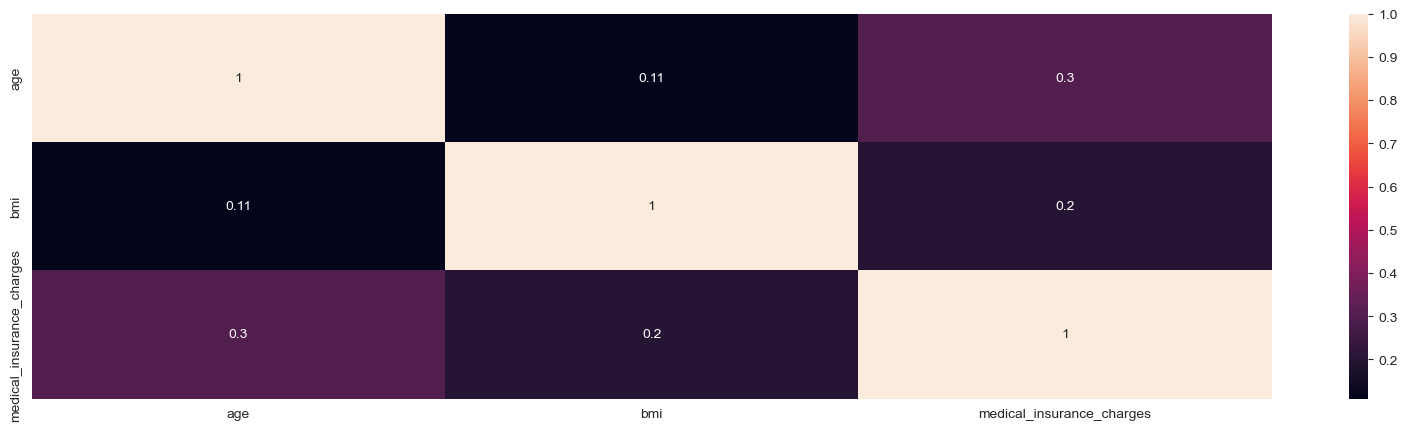

In [97]:
sns.heatmap(corr_faminsureco_data,annot=True)

<h2><b style="color:salmon"> Place your code here </b> </h2>

#### We've included an example of what the output *may* look like below

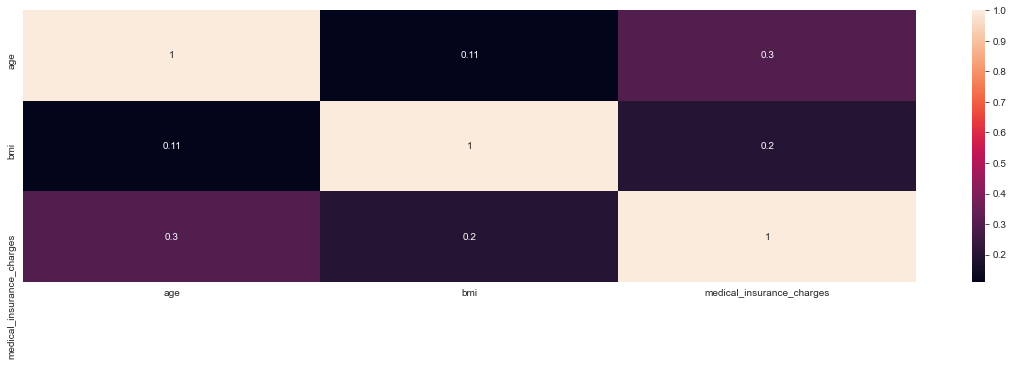

**Which variables seem to correlate with Medical Insurance Charges?**


You might have realised that you only have <b> 3 </b> variables appearing in your correlated Heatmap.
This might seem strange as you would recall creating some other variables such as `age_classification` and `bmi_classification`. 

Why don't they appear?

Well, the simple reason is that these variables <b> aren't </b> numerical variables, but textual.
Correlations can only be performed on <b> numerical variables </b>.

This means, we'll need to convert our textual variables INTO numerical variables.
We can do this using a function in pandas called `pd.get_dummies`. 

Take a look at the `FamInsureCo Inf. Stats Data` tab and look at the data we've converted for you; this is what we'll be doing in the below step. We're simply converting our categorical variables into numerical variables that we can then use correlation, to unpack, and better understand how they relate to our medical insurance charges! 

This is what we'll do in the below step, so let's get started!


### Step 12: <span style="color:purple">Creating Dummy Variables </span>

i) Using Pandas `pd.get_dummies()` function, convert the following variables and store this in a new dataframe called `faminsureco_converted`:

1. age_classification
2. bmi_classification
3. sex
4. smoker
5. region

The syntax of pd.get_dummies() takes the following arguments:

<a href = https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html> pd.get_dummies(dataframe['column_or_columns_of_interest']</a>

<b> Hint: If you need some additional guidance, click on the link over <a href = "https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html"> here! </a></b>

ii) Upon completion of this, join `faminsureco` and `faminsureco_converted` into <b> one </b> new dataframe called `faminsure_combined`. 

<b> Hint: Don't forget to think about using the `pd.concat` command you've learned about!</b>

iii) Having created `faminsure_combined`, re-run your correlation and visualise the corresponding Heatmap (as per Step 10).

What do you notice if you focus specifically on <b> medical insurance charges </b>?


C:\Users\seanf\AppData\Local\Temp\ipykernel_5056\3679160958.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(pd.concat([faminsureco_data, faminsureco_converted], axis=1).corr(), annot=True)


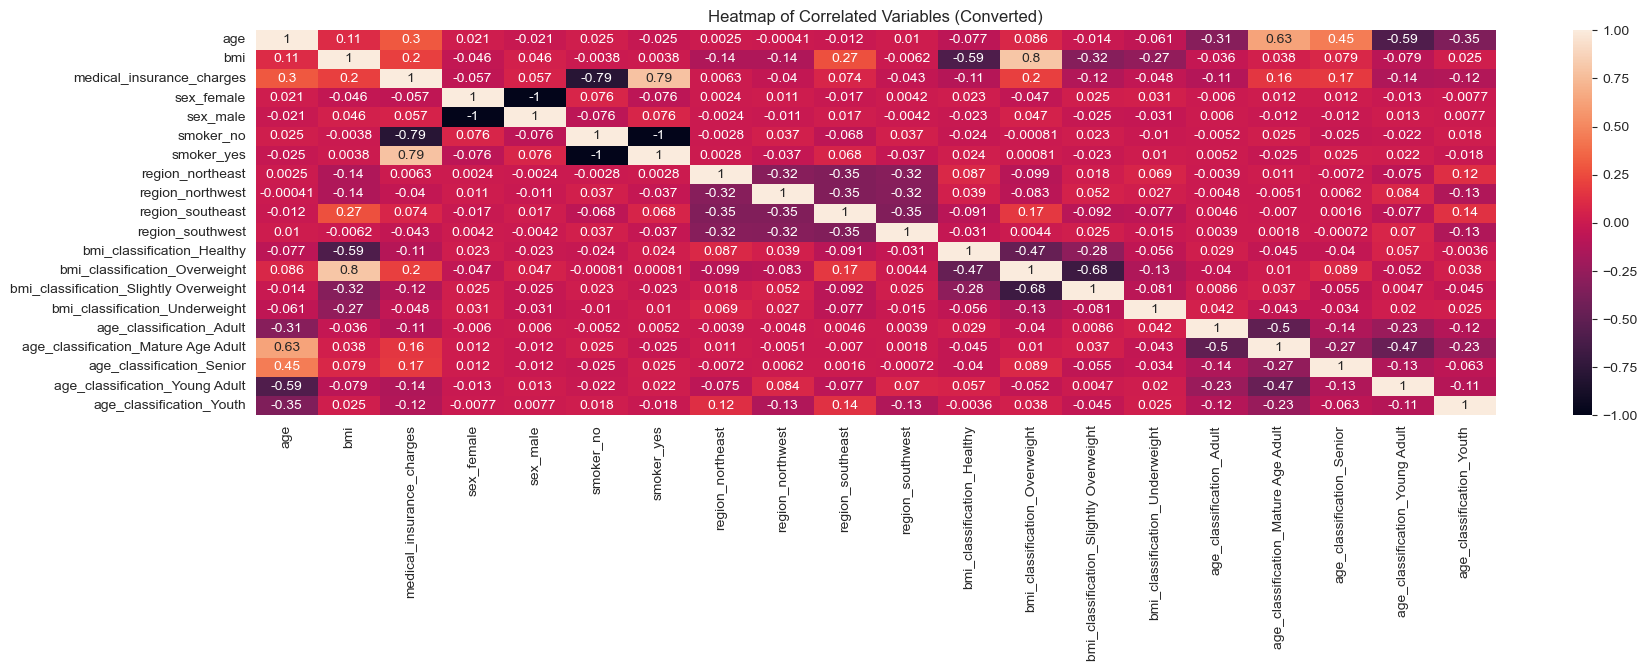

In [99]:
faminsureco_converted = pd.get_dummies(faminsureco_data[['sex', 'smoker', 'region', 'bmi_classification', 'age_classification']])

sns.heatmap(pd.concat([faminsureco_data, faminsureco_converted], axis=1).corr(), annot=True)
plt.title("Heatmap of Correlated Variables (Converted)")
plt.show()

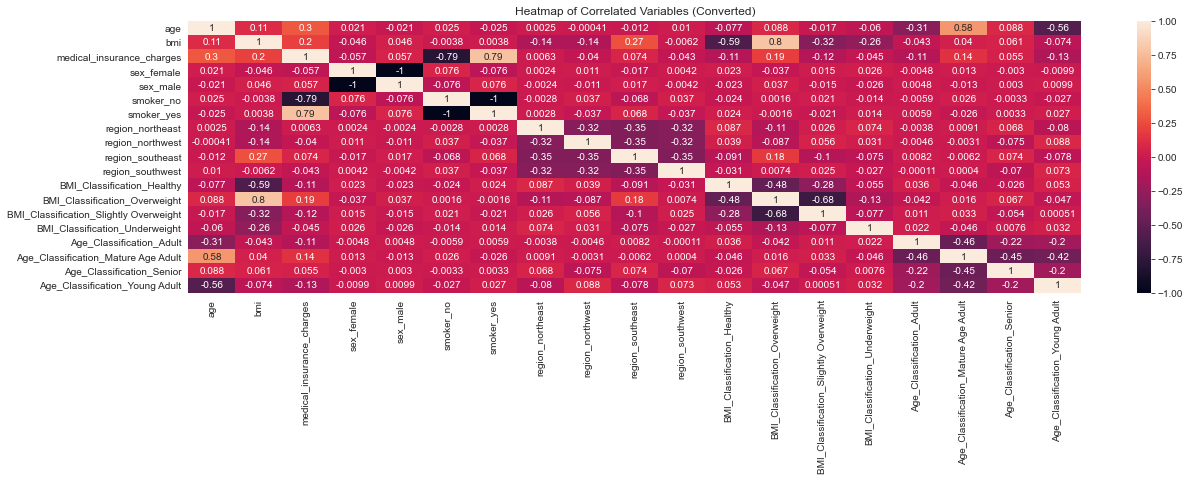


### Step 13: <span style="color:purple">Create a Barplot of Correlated Features</span>
<b> i) Using the correlated dataframe you've created earlier, create a barplot that shows the correlated features against Medical Insurance Charges, in descending order. </b>

You'll have to think carefully regarding this question.

You'd know that you can get the correlation values from the following command:

    dataframe.corr()
    
Upon printing this out, you should get a **dataframe** that looks like the below:


In [101]:
pd.concat([faminsureco_data, faminsureco_converted],axis=1).corr()

C:\Users\seanf\AppData\Local\Temp\ipykernel_5056\3060685903.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.concat([faminsureco_data, faminsureco_converted],axis=1).corr()


,age,bmi,medical_insurance_charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,bmi_classification_Healthy,bmi_classification_Overweight,bmi_classification_Slightly Overweight,bmi_classification_Underweight,age_classification_Adult,age_classification_Mature Age Adult,age_classification_Senior,age_classification_Young Adult,age_classification_Youth
age,1.000000,0.109272,0.299008,0.020856,-0.020856,0.025019,-0.025019,0.002475,-0.000407,-0.011642,0.010016,-0.077350,0.085668,-0.014125,-0.061373,-0.313855,0.628548,0.447705,-0.585431,-0.352096
bmi,0.109272,1.000000,0.198341,-0.046371,0.046371,-0.003750,0.003750,-0.138156,-0.135996,0.270025,-0.006205,-0.588173,0.799211,-0.323593,-0.270382,-0.035833,0.038225,0.078810,-0.079154,0.025352
medical_insurance_charges,0.299008,0.198341,1.000000,-0.057292,0.057292,-0.787251,0.787251,0.006349,-0.039905,0.073982,-0.043210,-0.105291,0.199532,-0.120075,-0.048117,-0.114735,0.162347,0.173898,-0.138009,-0.119123
sex_female,0.020856,-0.046371,-0.057292,1.000000,-1.000000,0.076185,-0.076185,0.002425,0.011156,-0.017117,0.004184,0.022770,-0.047317,0.024805,0.031388,-0.005968,0.012022,0.011733,-0.012765,-0.007699
sex_male,-0.020856,0.046371,0.057292,-1.000000,1.000000,-0.076185,0.076185,-0.002425,-0.011156,0.017117,-0.004184,-0.022770,0.047317,-0.024805,-0.031388,0.005968,-0.012022,-0.011733,0.012765,0.007699
smoker_no,0.025019,-0.003750,-0.787251,0.076185,-0.076185,1.000000,-1.000000,-0.002811,0.036945,-0.068498,0.036945,-0.023655,-0.000810,0.023087,-0.010424,-0.005174,0.025259,-0.024752,-0.021667,0.017838
smoker_yes,-0.025019,0.003750,0.787251,-0.076185,0.076185,-1.000000,1.000000,0.002811,-0.036945,0.068498,-0.036945,0.023655,0.000810,-0.023087,0.010424,0.005174,-0.025259,0.024752,0.021667,-0.017838
region_northeast,0.002475,-0.138156,0.006349,0.002425,-0.002425,-0.002811,0.002811,1.000000,-0.320177,-0.345561,-0.320177,0.086845,-0.098564,0.018452,0.068987,-0.003910,0.010578,-0.007178,-0.074900,0.120631
region_northwest,-0.000407,-0.135996,-0.039905,0.011156,-0.011156,0.036945,-0.036945,-0.320177,1.000000,-0.346265,-0.320829,0.039045,-0.082849,0.051859,0.026629,-0.004778,-0.005130,0.006203,0.084146,-0.132078
region_southeast,-0.011642,0.270025,0.073982,-0.017117,0.017117,-0.068498,0.068498,-0.345561,-0.346265,1.000000,-0.346265,-0.091009,0.170445,-0.091820,-0.077195,0.004579,-0.007014,0.001625,-0.076875,0.138429


,age,bmi,medical_insurance_charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,BMI_Classification_Healthy,BMI_Classification_Overweight,BMI_Classification_Slightly Overweight,BMI_Classification_Underweight,Age_Classification_Adult,Age_Classification_Mature Age Adult,Age_Classification_Senior,Age_Classification_Young Adult
age,1.000000,0.109272,0.299008,0.020856,-0.020856,0.025019,-0.025019,0.002475,-0.000407,-0.011642,0.010016,-0.077350,0.087947,-0.017395,-0.060142,-0.311303,0.577871,0.087979,-0.557327
bmi,0.109272,1.000000,0.198341,-0.046371,0.046371,-0.003750,0.003750,-0.138156,-0.135996,0.270025,-0.006205,-0.588173,0.795053,-0.324201,-0.264664,-0.043014,0.040105,0.061473,-0.074071
medical_insurance_charges,0.299008,0.198341,1.000000,-0.057292,0.057292,-0.787251,0.787251,0.006349,-0.039905,0.073982,-0.043210,-0.105291,0.193952,-0.115902,-0.044960,-0.111249,0.137666,0.054679,-0.128788
sex_female,0.020856,-0.046371,-0.057292,1.000000,-1.000000,0.076185,-0.076185,0.002425,0.011156,-0.017117,0.004184,0.022770,-0.036680,0.014861,0.025927,-0.004764,0.013162,-0.003002,-0.009909
sex_male,-0.020856,0.046371,0.057292,-1.000000,1.000000,-0.076185,0.076185,-0.002425,-0.011156,0.017117,-0.004184,-0.022770,0.036680,-0.014861,-0.025927,0.004764,-0.013162,0.003002,0.009909
smoker_no,0.025019,-0.003750,-0.787251,0.076185,-0.076185,1.000000,-1.000000,-0.002811,0.036945,-0.068498,0.036945,-0.023655,0.001649,0.021422,-0.013803,-0.005946,0.026344,-0.003261,-0.026529
smoker_yes,-0.025019,0.003750,0.787251,-0.076185,0.076185,-1.000000,1.000000,0.002811,-0.036945,0.068498,-0.036945,0.023655,-0.001649,-0.021422,0.013803,0.005946,-0.026344,0.003261,0.026529
region_northeast,0.002475,-0.138156,0.006349,0.002425,-0.002425,-0.002811,0.002811,1.000000,-0.320177,-0.345561,-0.320177,0.086845,-0.106209,0.026017,0.074146,-0.003815,0.009079,0.067983,-0.079820
region_northwest,-0.000407,-0.135996,-0.039905,0.011156,-0.011156,0.036945,-0.036945,-0.320177,1.000000,-0.346265,-0.320829,0.039045,-0.087004,0.055892,0.030765,-0.004632,-0.003086,-0.074645,0.087533
region_southeast,-0.011642,0.270025,0.073982,-0.017117,0.017117,-0.068498,0.068498,-0.345561,-0.346265,1.000000,-0.346265,-0.091009,0.178965,-0.102897,-0.075306,0.008244,-0.006153,0.074012,-0.077985


You might think to yourself this looks **suspiciously like a dataframe with columns that you can manipulate**.

This is indeed the case. 

With this hint in mind, you should be able to **select the relevant column of interest and combine this with the .plot(kind='__') function to answer the question**. Don't forget to think about .sort_values() to help sort your data!

C:\Users\seanf\AppData\Local\Temp\ipykernel_5056\1071380924.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.concat([faminsureco_data, faminsureco_converted],axis=1).corr()['medical_insurance_charges'].sort_values(ascending=False)[1:].plot(kind='bar')


<Axes: >

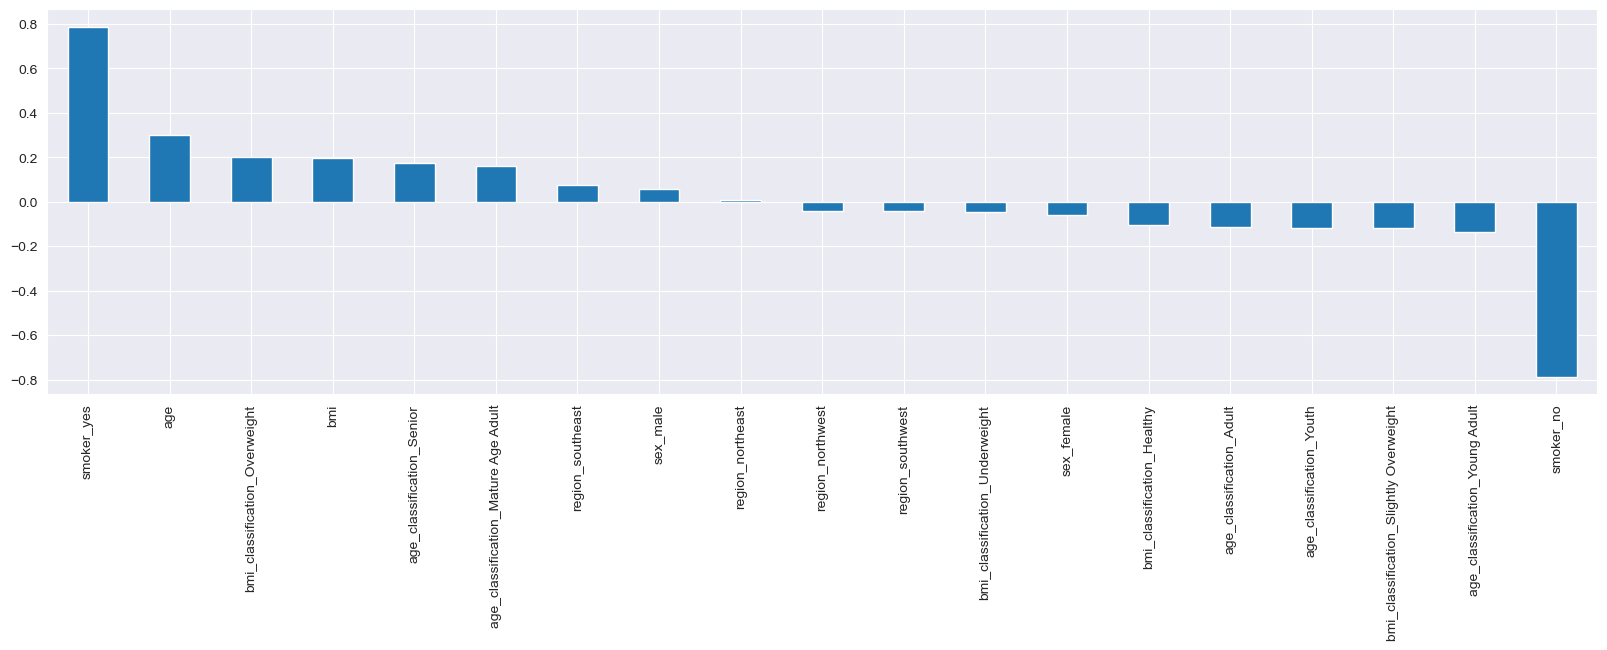

In [103]:
pd.concat([faminsureco_data, faminsureco_converted],axis=1).corr()['medical_insurance_charges'].sort_values(ascending=False)[1:].plot(kind='bar')

<h2><b style="color:salmon"> Place your code here </b> </h2>

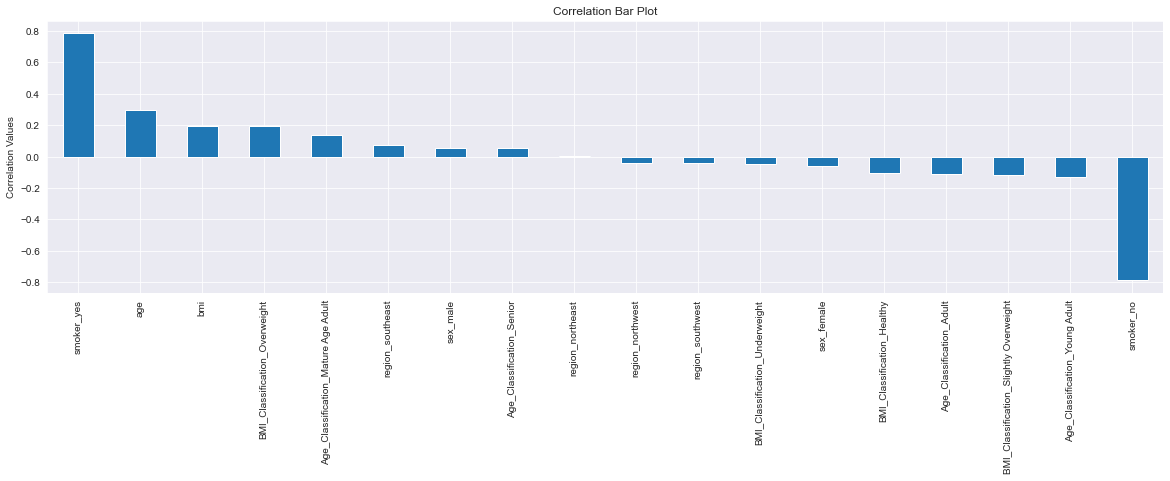

### Step 14: <span style="color:purple">Create a Heatmap using the Outlier Free Dataframe</span> 
Previously, you created a correlation matrix using the `Faminsureco` dataframe. Let's revisit the Outlier Free Dataframe you created in Step 11. 

<b> i) Using the same steps you went through in Unit 10, convert the `bmi_classification` and `age_classification` columns in the `FamInsureCoOutliers` Dataframe. Upon completion of this, using Seaborn's heatmap function, create a heatmap that clearly shows the correlations (including R) for all variables using the `Faminsureco` dataset. </b>

ii) Create a Bar Plot focusing on the `medical_insurance_charges` in your correlated dataframe you've created. 

What do you observe when focusing on the `medical_insurance_charges`?

<h2><b style="color:salmon"> Place your code here </b> </h2>

In [104]:
corr_faminsureco_data_no = faminsureco_data_no.corr()
corr_faminsureco_data_no

faminsureco_converted_no = pd.get_dummies(faminsureco_data_no, columns =['age_classification','bmi_classification', 'sex', 'smoker', 'region'])
faminsureco_converted_no

C:\Users\seanf\AppData\Local\Temp\ipykernel_5056\2600544527.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_faminsureco_data_no = faminsureco_data_no.corr()


,age,bmi,medical_insurance_charges,age_classification_Adult,age_classification_Mature Age Adult,age_classification_Senior,age_classification_Young Adult,age_classification_Youth,bmi_classification_Healthy,bmi_classification_Overweight,bmi_classification_Slightly Overweight,bmi_classification_Underweight,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,18,20.790,1607.51,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0
1,18,24.090,2201.10,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0
2,19,24.700,1737.38,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1
3,19,24.510,2709.11,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0
4,19,22.515,2117.34,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,32,17.765,32734.19,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0
1334,27,17.955,15006.58,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0
1335,26,17.195,14455.64,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0
1336,39,18.300,19023.26,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1


C:\Users\seanf\AppData\Local\Temp\ipykernel_5056\589176408.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_faminsureco_data_combined_no = faminsure_combined_no.corr()


<Axes: >

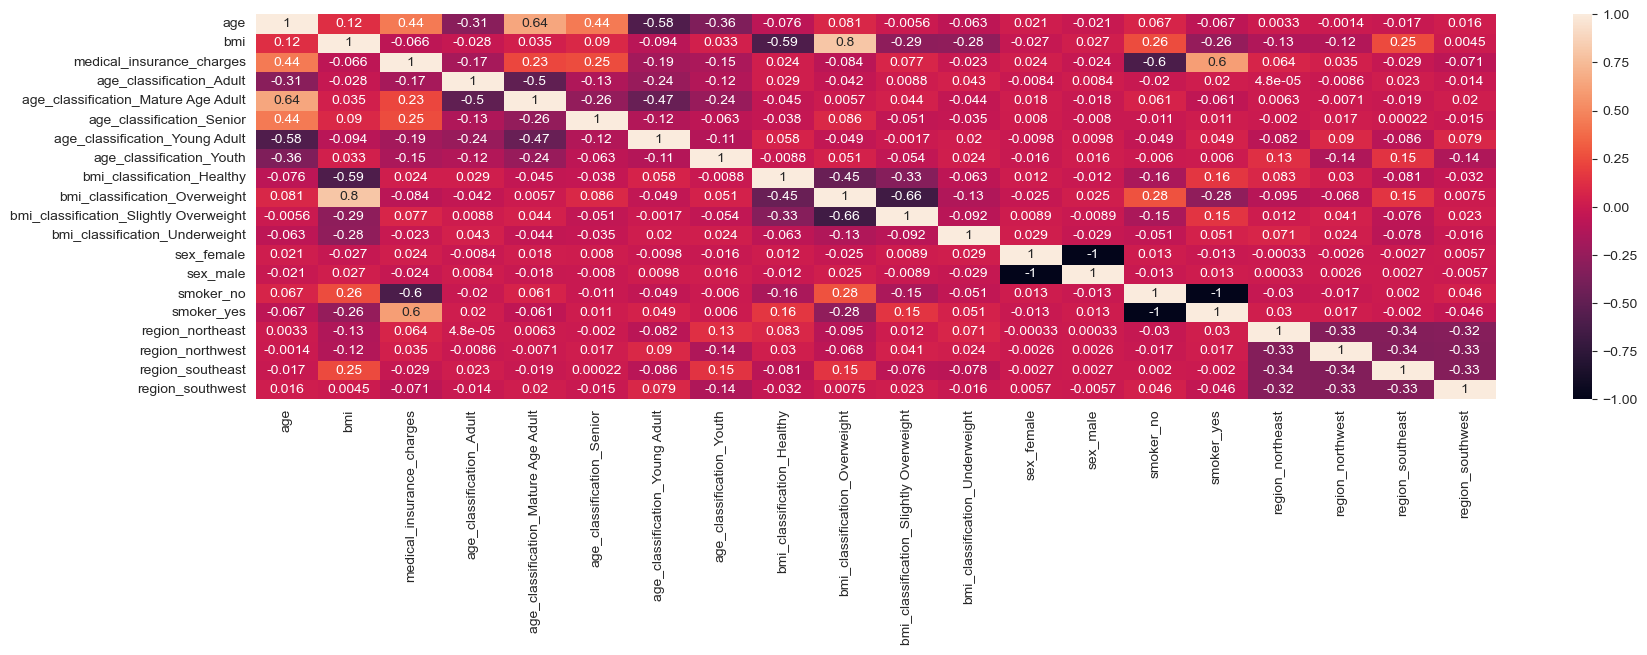

In [105]:
faminsure_combined_no = pd.concat([faminsureco_data_no, faminsureco_converted_no], axis=0)

corr_faminsureco_data_combined_no = faminsure_combined_no.corr()

sns.heatmap(corr_faminsureco_data_combined_no,annot=True)

C:\Users\seanf\AppData\Local\Temp\ipykernel_5056\2903050083.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.concat([faminsureco_data_no, faminsureco_converted_no],axis=0).corr()['medical_insurance_charges'].sort_values(ascending=False)[1:].plot(kind='bar')


<Axes: >

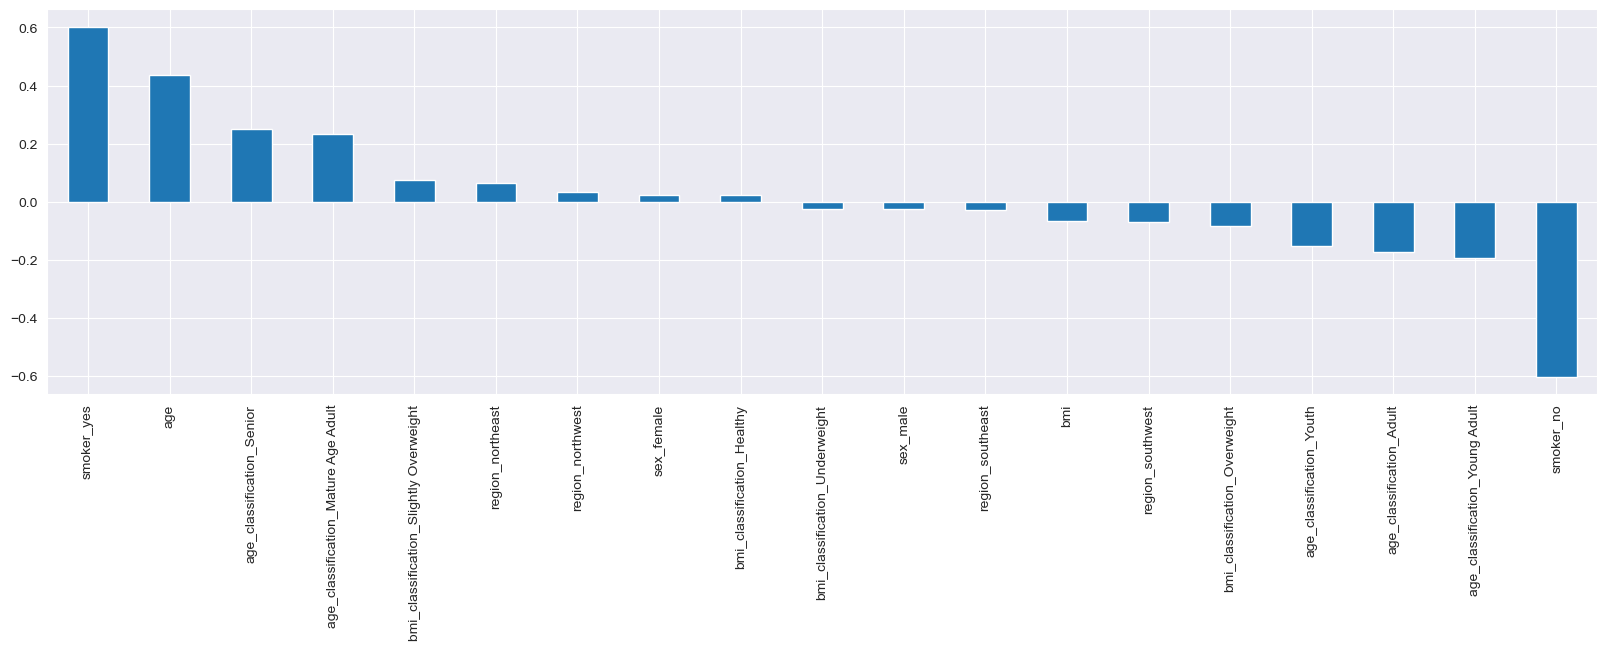

In [106]:
pd.concat([faminsureco_data_no, faminsureco_converted_no],axis=0).corr()['medical_insurance_charges'].sort_values(ascending=False)[1:].plot(kind='bar')

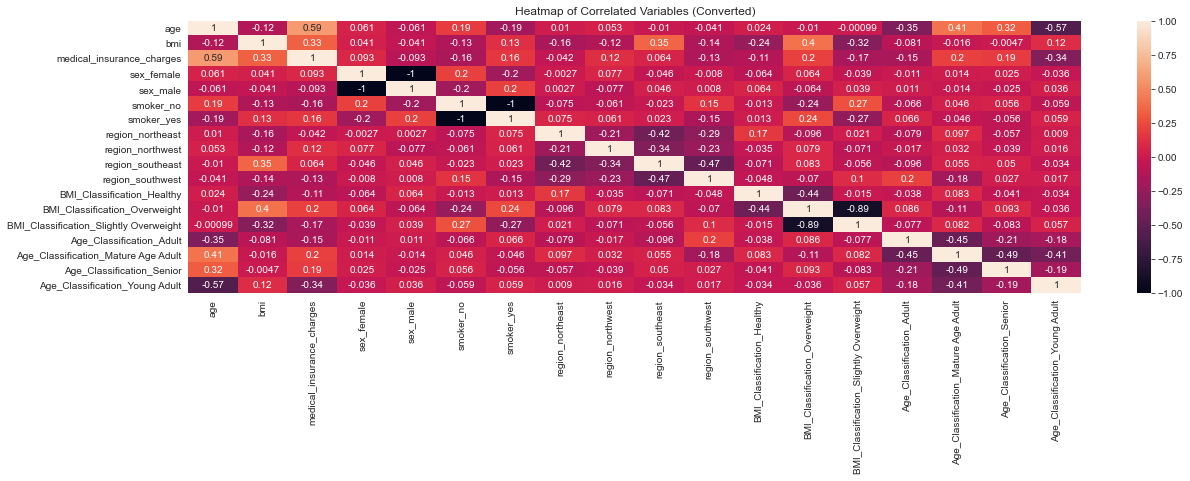

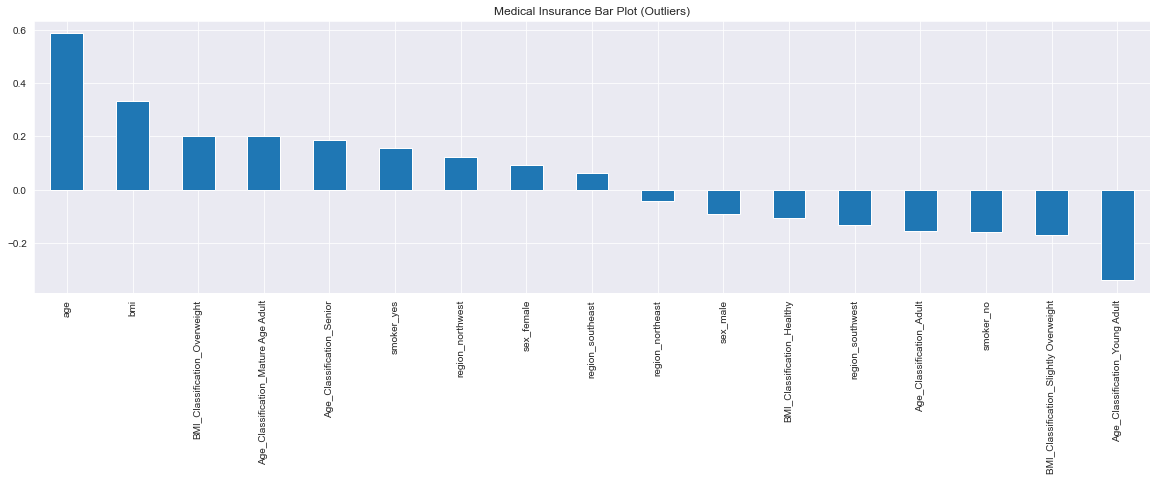

<b> Do any variables stand out? If yes, list these out below your heatmap. </b>

<h3> <span style="color:orange"> Please note that Step 13 - Step 15 are challening questions and will intentionally be more difficult. </h3> 

### Creating a Multiple Regression Model


# When you worked on this case study in Excel, you went through the tricky process of manually building out your regressive equation. It's good for you to know that this process is much simpler in Python!  

For this step, you'll be using the statsmodel.api library you imported earlier and calling the Ordinary Least Squares Regression to create a multiple regression model (which is a linear regression model with more than one independent variable).

### Step 15: <span style="color:purple">Use OLS Regression</span> 
<b> i) Using the OLS Regression Model in the statsmodel.api library, create a regression equation that models the Medical Insurance Charges (Y-Variable) against all your independent variables in the `FamInsureCo_Combined` dataframe. </b>

In order to fit a linear regression model with statsmodels.api there are a few steps that need to be taken. We have demonstrated this below:

<b> Don't forget to reimport the dataframes you've previously imported in Step 2 before starting these steps </b> 

    1. Establish two dataframes named, independent_variables and dependent_variables. The independent variables are known as explanatory variables - they help EXPLAIN what you are trying to model. Dependent Variable on the other hand is the variable of interest that you want to MODEL. In this case, the Dependent Variable is Medical Insurance Charges.
    
    2. Add a constant to your Independent Dataframe via the following syntax:
    independent_variables = sm.add_constant(independent_variables). This will simply add a constant stream of 1's in a column to your dataframe. This constant is used to account for bias in the model.  
    
    3. Store and Fit your model with the below syntax:
    regression_model = sm.OLS(dependent_variable,independent_variable).fit() 
    
    4. Print the regression_model.summary() to view the Regression Statistics 


In [ ]:
faminsureco_combined = pd.concat([faminsureco_data, faminsureco_converted], axis=1)

In [114]:
independent_variable = faminsureco_combined[['age', 'bmi', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest', 'bmi_classification_Healthy',
       'bmi_classification_Overweight',
       'bmi_classification_Slightly Overweight',
       'bmi_classification_Underweight', 'age_classification_Adult',
       'age_classification_Mature Age Adult', 'age_classification_Senior',
       'age_classification_Young Adult']].fillna(0)

dependent_variables = faminsureco_combined['medical_insurance_charges']
independent_variables = sm.add_constant(independent_variable)

independent_variables.dtypes

regression_model_1 = sm.OLS(dependent_variables, independent_variables).fit()
regression_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     medical_insurance_charges   R-squared:                       0.756
Model:                                   OLS   Adj. R-squared:                  0.753
Method:                        Least Squares   F-statistic:                     292.8
Date:                       Thu, 09 Nov 2023   Prob (F-statistic):               0.00
Time:                               08:10:52   Log-Likelihood:                -13534.
No. Observations:                       1338   AIC:                         2.710e+04
Df Residuals:                           1323   BIC:                         2.718e+04
Df Model:                                 14                                         
Covariance Type:                   nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                   1377.7428    673.944      2.044      0.041      55.626    2699.859
age                                      331.4464     31.605     10.487      0.000     269.445     393.447
bmi                                      131.8139     54.231      2.431      0.015      25.425     238.203
sex_female                               762.8371    375.133      2.034      0.042      26.917    1498.757
sex_male                                 614.9057    375.444      1.638      0.102    -121.624    1351.436
smoker_no                              -1.126e+04    381.942    -29.469      0.000    -1.2e+04   -1.05e+04
smoker_yes                              1.263e+04    407.146     31.029      0.000    1.18e+04    1.34e+04
region_northeast                         938.2480    320.967      2.923      0.004     308.588    1567.909
region_northwest                         464.6280    331.079      1.403      0.161    -184.869    1114.125
region_southeast                          73.0437    358.856      0.204      0.839    -630.944     777.032
region_southwest                         -98.1769    341.677     -0.287      0.774    -768.465     572.111
bmi_classification_Healthy              -454.8413    450.809     -1.009      0.313   -1339.220     429.537
bmi_classification_Overweight           2746.4042    742.667      3.698      0.000    1289.470    4203.339
bmi_classification_Slightly Overweight  -106.2609    468.858     -0.227      0.821   -1026.048     813.526
bmi_classification_Underweight          -807.5591   1071.149     -0.754      0.451   -2908.896    1293.778
age_classification_Adult                -901.7798    919.656     -0.981      0.327   -2705.922     902.362
age_classification_Mature Age Adult    -1908.4055   1229.379     -1.552      0.121   -4320.150     503.339
age_classification_Senior              -2672.5131   1713.032     -1.560      0.119   -6033.069     688.042
age_classification_Young Adult          1044.0225    859.533      1.215      0.225    -642.174    2730.219
==============================================================================
Omnibus:                      318.763   Durbin-Watson:                   1.172
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              772.817
Skew:                           1.278   Prob(JB):                    1.53e-168
Kurtosis:                       5.706   Cond. No.                     3.99e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.21e-31. This might indicate that there are
st

<h2><b style="color:salmon"> Place your code here </b> </h2> 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     medical_insurance_charges   R-squared:                       0.755
Model:                                   OLS   Adj. R-squared:                  0.752
Method:                        Least Squares   F-statistic:                     313.2
Date:                       Mon, 05 Dec 2022   Prob (F-statistic):               0.00
Time:                               11:36:01   Log-Likelihood:                -13538.
No. Observations:                       1338   AIC:                         2.710e+04
Df Residuals:                           1324   BIC:                         2.718e+04
Df Model:                                 13                                         
Covariance Type:                   nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                   1310.9572    553.334      2.369      0.018     225.451    2396.464
age                                      286.8921     17.121     16.757      0.000     253.305     320.479
bmi                                      156.5518     53.081      2.949      0.003      52.420     260.683
sex_female                               711.7010    320.923      2.218      0.027      82.128    1341.274
sex_male                                 599.2562    323.886      1.850      0.065     -36.129    1234.642
smoker_no                              -1.127e+04    330.194    -34.118      0.000   -1.19e+04   -1.06e+04
smoker_yes                              1.258e+04    358.625     35.069      0.000    1.19e+04    1.33e+04
region_northeast                         950.0813    312.888      3.036      0.002     336.271    1563.892
region_northwest                         464.4795    314.210      1.478      0.140    -151.925    1080.884
region_southeast                          14.1444    345.633      0.041      0.967    -663.904     692.193
region_southwest                        -117.7480    322.351     -0.365      0.715    -750.123     514.627
BMI_Classification_Healthy              -342.8704    452.274     -0.758      0.449   -1230.122     544.381
BMI_Classification_Overweight           2483.4571    720.508      3.447      0.001    1069.994    3896.920
BMI_Classification_Slightly Overweight   -67.4905    463.431     -0.146      0.884    -976.631     841.650
BMI_Classification_Underweight          -762.1390   1093.885     -0.697      0.486   -2908.076    1383.798
Age_Classification_Adult                 -28.3892    355.829     -0.080      0.936    -726.439     669.660
Age_Classification_Mature Age Adult     -421.0890    381.139     -1.105      0.269   -1168.791     326.613
Age_Classification_Senior                317.2186    401.156      0.791      0.429    -469.753    1104.190
Age_Classification_Young Adult          1443.2168    421.670      3.423      0.001     616.002    2270.432
==============================================================================
Omnibus:                      320.098   Durbin-Watson:                   1.177
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              779.800
Skew:                           1.282   Prob(JB):                    4.66e-170
Kurtosis:                       5.723   Cond. No.                     7.70e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.93e-30. This might indicate that there are

<b> What do you observe from the R Squared Value in your model? Is the model a good fit or a poor fit? </b>

### Step 16: <span style="color:purple">Use OLS Regression Again</span> 

Now we've fitted a model using the `Faminsureco_Combined` Dataframe, where we haven't removed any outliers from our data.
Now we know that Outliers are deviations in our dataset, greater than +- 3 standard deviations away from our population mean.

Would our model potentially score higher if we *remove* these outliers from our analysis? Let's take a look and try this out!

<b> i) Remove the Outliers from the `FamInsureCo_Combined` Dataframe using the Syntax we've highlighted below and store this in a new dataframe called `FamInsureCo_Combined_Dataframe_Outliers_Removed` </b>
 
    Q1 = faminsureco_combined['medical_insurance_charges'].quantile(0.25)
    Q3 = faminsureco_combined['medical_insurance_charges'].quantile(0.75)
    IQR = Q3 - Q1
    Upper_Limit = Q3 + 1.5 * IQR
    faminsureco_combined[~(faminsureco_combined['medical_insurance_charges'] > Upper_Limit)]

ii) Upon completion of this, create a regression equation that models the Medical Insurance Charges (Y-Variable) against all your independent variables in the `FamInsureCo_Combined_Dataframe_Outliers_Removed` dataframe. </b>

<b> Hint: Watch out for the capitalisation; Python is case sensitive so be careful when looking at your variable names! </b>

In [68]:
independent_variables = faminsureco_converted_no[['age', 'bmi', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest', 'bmi_classification_Healthy',
       'bmi_classification_Overweight',
       'bmi_classification_Slightly Overweight',
       'bmi_classification_Underweight', 'age_classification_Adult',
       'age_classification_Mature Age Adult', 'age_classification_Senior',
       'age_classification_Young Adult']].fillna(0)

dependent_variables = faminsureco_converted_no['medical_insurance_charges']
independent_variables = sm.add_constant(independent_variables)

independent_variables.dtypes

regression_model_2 = sm.OLS(dependent_variables, independent_variables).fit()
regression_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     medical_insurance_charges   R-squared:                       0.611
Model:                                   OLS   Adj. R-squared:                  0.607
Method:                        Least Squares   F-statistic:                     132.9
Date:                       Thu, 09 Nov 2023   Prob (F-statistic):          4.24e-231
Time:                               07:49:24   Log-Likelihood:                -11791.
No. Observations:                       1199   AIC:                         2.361e+04
Df Residuals:                           1184   BIC:                         2.369e+04
Df Model:                                 14                                         
Covariance Type:                   nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                   2111.5554    547.382      3.858      0.000    1037.608    3185.503
age                                      325.9180     25.454     12.804      0.000     275.978     375.858
bmi                                      -42.0153     45.104     -0.932      0.352    -130.508      46.478
sex_female                              1239.7582    303.022      4.091      0.000     645.238    1834.279
sex_male                                 871.7972    304.143      2.866      0.004     275.079    1468.516
smoker_no                              -6304.6074    340.027    -18.542      0.000   -6971.729   -5637.486
smoker_yes                              8416.1628    356.288     23.622      0.000    7717.137    9115.188
region_northeast                        1205.0439    256.147      4.705      0.000     702.492    1707.596
region_northwest                         832.3344    261.546      3.182      0.001     319.189    1345.480
region_southeast                         243.6123    288.930      0.843      0.399    -323.260     810.485
region_southwest                        -169.4352    275.501     -0.615      0.539    -709.959     371.088
bmi_classification_Healthy               178.2714    342.431      0.521      0.603    -493.567     850.110
bmi_classification_Overweight           1929.0307    604.628      3.190      0.001     742.769    3115.293
bmi_classification_Slightly Overweight  1002.8700    365.181      2.746      0.006     286.396    1719.344
bmi_classification_Underweight          -998.6167    815.913     -1.224      0.221   -2599.413     602.179
age_classification_Adult               -1661.5038    723.049     -2.298      0.022   -3080.104    -242.904
age_classification_Mature Age Adult    -2856.2445    980.708     -2.912      0.004   -4780.364    -932.125
age_classification_Senior              -3016.1607   1373.143     -2.197      0.028   -5710.225    -322.096
age_classification_Young Adult           495.8524    674.542      0.735      0.462    -827.579    1819.284
==============================================================================
Omnibus:                      733.313   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4956.694
Skew:                           2.931   Prob(JB):                         0.00
Kurtosis:                      11.054   Cond. No.                     1.13e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.41e-30. This might indicate that there are
st

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     medical_insurance_charges   R-squared:                       0.609
Model:                                   OLS   Adj. R-squared:                  0.605
Method:                        Least Squares   F-statistic:                     142.0
Date:                       Mon, 05 Dec 2022   Prob (F-statistic):          9.52e-231
Time:                               11:35:46   Log-Likelihood:                -11794.
No. Observations:                       1199   AIC:                         2.362e+04
Df Residuals:                           1185   BIC:                         2.369e+04
Df Model:                                 13                                         
Covariance Type:                   nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                   1928.4953    448.696      4.298      0.000    1048.168    2808.823
age                                      273.8865     13.705     19.985      0.000     246.998     300.775
bmi                                      -27.5628     43.992     -0.627      0.531    -113.874      58.748
sex_female                              1139.9473    257.959      4.419      0.000     633.840    1646.055
sex_male                                 788.5481    262.272      3.007      0.003     273.978    1303.118
smoker_no                              -6370.5772    301.622    -21.121      0.000   -6962.349   -5778.805
smoker_yes                              8299.0725    320.145     25.923      0.000    7670.958    8927.187
region_northeast                        1192.4692    249.580      4.778      0.000     702.802    1682.137
region_northwest                         771.0151    247.862      3.111      0.002     284.718    1257.312
region_southeast                         194.2121    277.722      0.699      0.484    -350.669     739.093
region_southwest                        -229.2011    258.846     -0.885      0.376    -737.048     278.645
BMI_Classification_Healthy               202.7250    343.123      0.591      0.555    -470.472     875.922
BMI_Classification_Overweight           1753.6525    582.710      3.009      0.003     610.395    2896.910
BMI_Classification_Slightly Overweight   981.0385    358.885      2.734      0.006     276.917    1685.160
BMI_Classification_Underweight         -1008.9206    832.689     -1.212      0.226   -2642.630     624.789
Age_Classification_Adult                 -68.9711    285.602     -0.241      0.809    -629.314     491.372
Age_Classification_Mature Age Adult     -365.8402    306.925     -1.192      0.234    -968.018     236.338
Age_Classification_Senior                703.8250    317.899      2.214      0.027      80.118    1327.532
Age_Classification_Young Adult          1659.4816    334.109      4.967      0.000    1003.970    2314.993
==============================================================================
Omnibus:                      734.511   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4949.563
Skew:                           2.939   Prob(JB):                         0.00
Kurtosis:                      11.033   Cond. No.                     1.79e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.69e-31. This might indicate that there are

<h4> <b> Compare the Models you've created and observe the R Squared displayed for each model - which model seems better and why? Put your thoughts down below.  </b> If you're not sure how to answer this, you should reference the resource <a href = https://blog.minitab.com/en/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit> here </a> for a more detailed explanation.



### Step 17: <span style="color:purple">Analysis of Coefficients </span>

Great job creating those regressive equations! You've reached the final two steps of this case study!

We've now identified that *one* of our regressive models has a better fit than the previous model.

Using this model, we want to **extract** the co-efficients to better understand the variables that display the largest *absolute* rate of change with respect to `medical_insurance_charges`. We'll use the co-efficients to better assess this from an *absolute* rate of change perspective. (i.e. Which variables spike the most in relation to `medical_insurance_charges`?)

<b>Please note we are not concerned about Multicolinearity and the associated impacts so we are not using standardisation here </b>

<b> i) Using the .params method, extract the Coefficients from your regression_model and create a bar plot that identifies which coefficients react most strongly with respect to `medical_insurance_charges`. Which variables seem to showcase the strongest 'relationship' with respect to `medical_insurance_charges`? </b>

You can use params via the following syntax:

    model.params where model represents the name of the regression model you've created.

We've included an example below that showcases what your chart should look like upon completion of this exercise. 



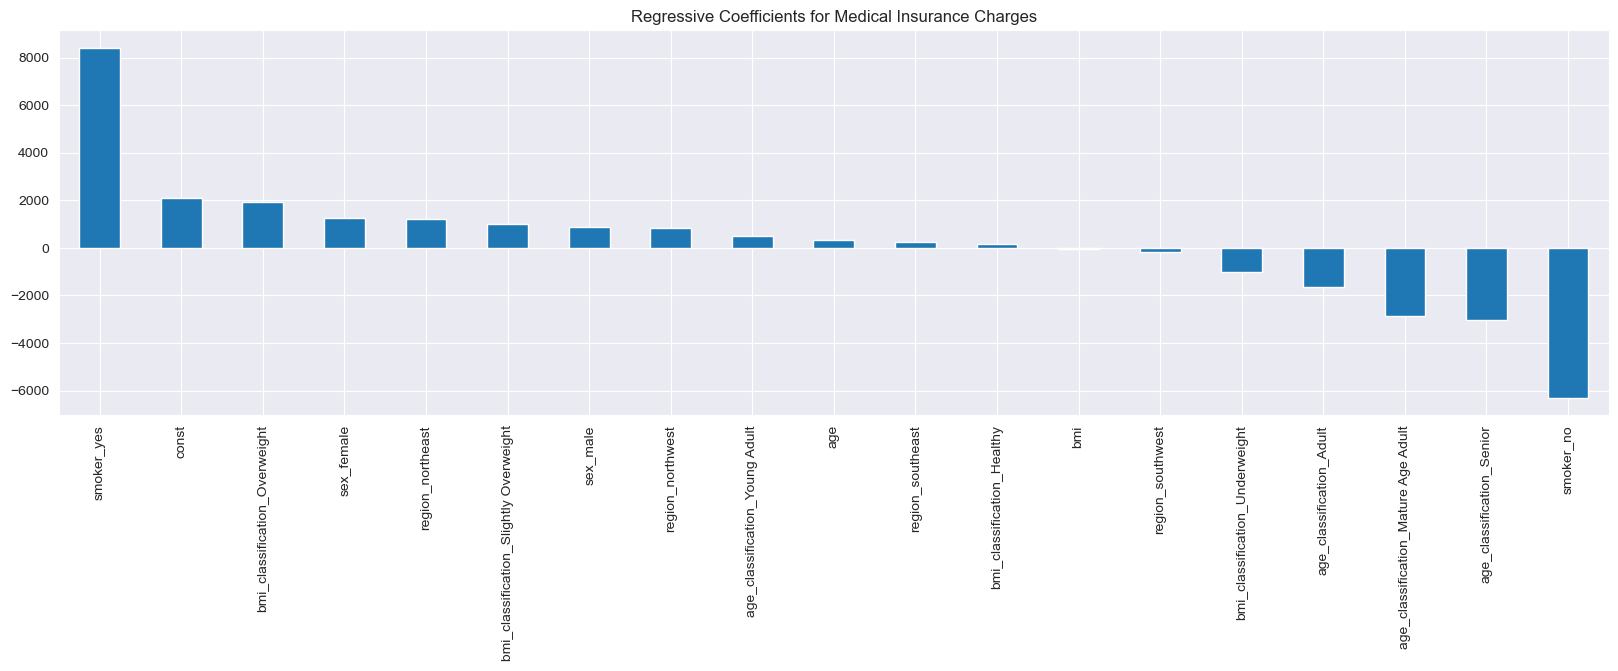

In [70]:
regression_model_2.params.sort_values(ascending=False).plot(kind='bar')
plt.title("Regressive Coefficients for Medical Insurance Charges")
plt.show()

<h2><b style="color:salmon"> Place your code here </b> </h2>

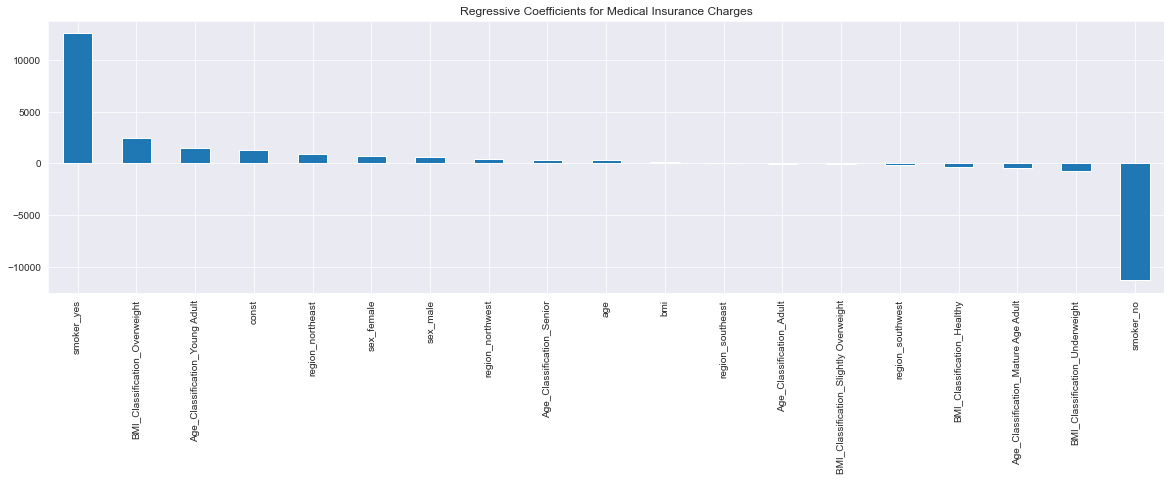


### Step 18: <span style="color:purple">Validate Predictions</span> 

Now it's time for us to <b> validate our predictions. </b>
    
Once you've created a regressive_model, you can call this using the following syntax:

        regressive_model.predict(independent_variables). 
        
Extra information regarding how this works can be found <a href = https://www.statsmodels.org/stable/examples/notebooks/generated/predict.html> here </a>

<b> 
i) Create a new column in the `faminsureco_combined` dataframe, called, 'Prediction'. 
    
ii) Use the regression equation you created in the previous steps (Step 13) and apply the .predict() function to the independent variables in the `faminsureco_combined` dataset so you get a column full of your regressive predictions.
    
iii) Create a Dual-Axis Plot with the following axes items: <p>
    
        Axes One would contain: Medical Insurance Charges
        Axes two would contain: Prediction
</b>


**Note:** Don't forget how to use .twinx() to help you out with the dual axis!

    primary_axes = someDataframe['A'].plot()
    second_axes = primary_axes.twinx()
    second_axes.plot(someDataframe['B'])
    plt.show()

We've included an example below of how your chart might look once you're done!

<h2><b style="color:salmon"> Place your code here </b> </h2>

,age,sex,bmi,smoker,region,medical_insurance_charges,BMI_Classification,Age_Classification,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,BMI_Classification_Healthy,BMI_Classification_Overweight,BMI_Classification_Slightly Overweight,BMI_Classification_Underweight,Age_Classification_Adult,Age_Classification_Mature Age Adult,Age_Classification_Senior,Age_Classification_Young Adult,Prediction
430,59,female,34.800,no,southwest,36910.61,Overweight,Mature Age Adult,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,NaN
439,61,female,33.330,no,southeast,36580.28,Overweight,Senior,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,NaN
873,55,female,26.800,no,southwest,35160.13,Slightly Overweight,Mature Age Adult,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,NaN
1106,45,male,22.895,yes,northeast,35069.37,Healthy,Mature Age Adult,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,NaN
1114,34,female,31.920,yes,northeast,37701.88,Overweight,Adult,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,45,male,30.360,yes,southeast,62592.87,Overweight,Mature Age Adult,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,NaN
1260,62,male,30.875,yes,northwest,46718.16,Overweight,Senior,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,NaN
1305,24,male,28.500,yes,northeast,35147.53,Slightly Overweight,Young Adult,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,NaN
1308,42,male,26.070,yes,southeast,38245.59,Slightly Overweight,Mature Age Adult,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,NaN


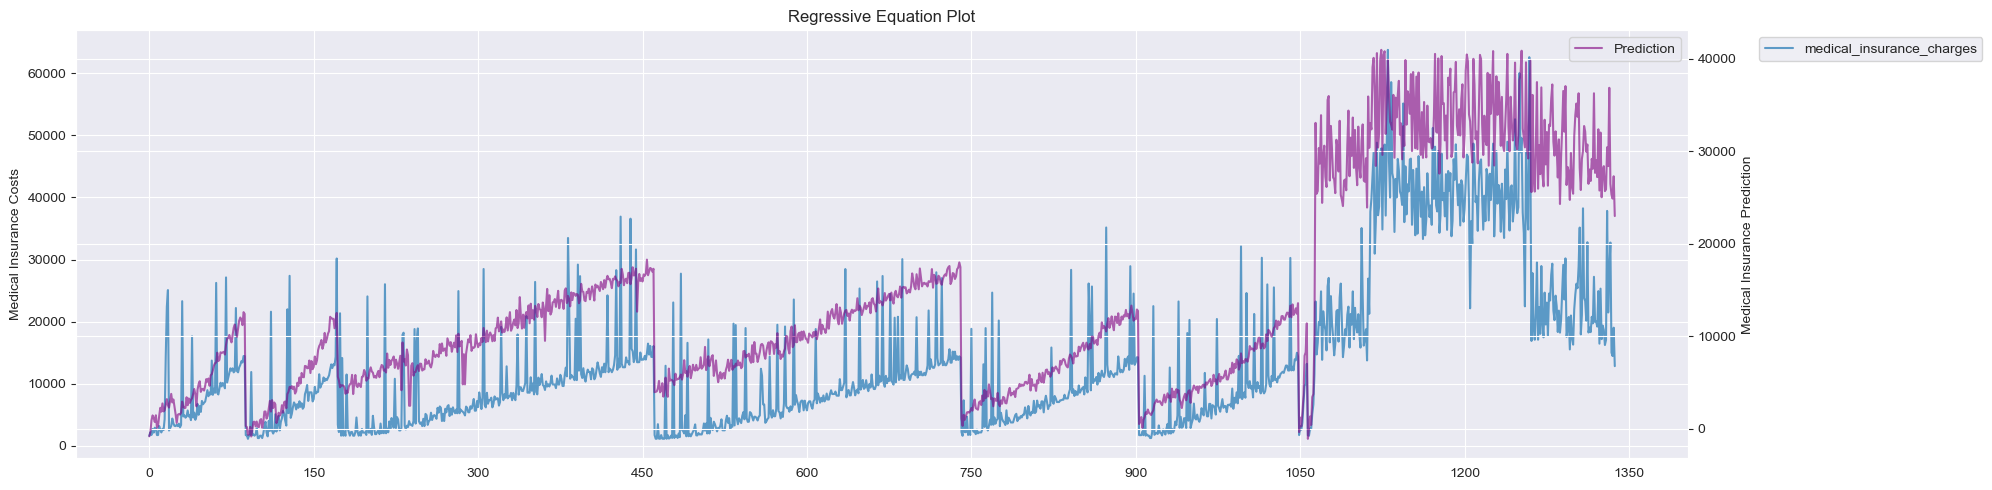

In [115]:
faminsureco_combined['Prediction'] = regression_model_1.predict(independent_variables)
primary_axes = faminsureco_combined['medical_insurance_charges'].plot(alpha=0.7)
plt.ylabel("Medical Insurance Costs")
primary_axes.xaxis.set_major_locator(plt.MaxNLocator(10))
second_axes = primary_axes.twinx()
second_axes.plot(faminsureco_combined['Prediction'], color='purple', alpha=0.6, label='Prediction')
second_axes.xaxis.set_major_locator(plt.MaxNLocator(10))
second_axes.legend()
primary_axes.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title("Regressive Equation Plot")
plt.ylabel("Medical Insurance Prediction")
plt.tight_layout()
plt.show()

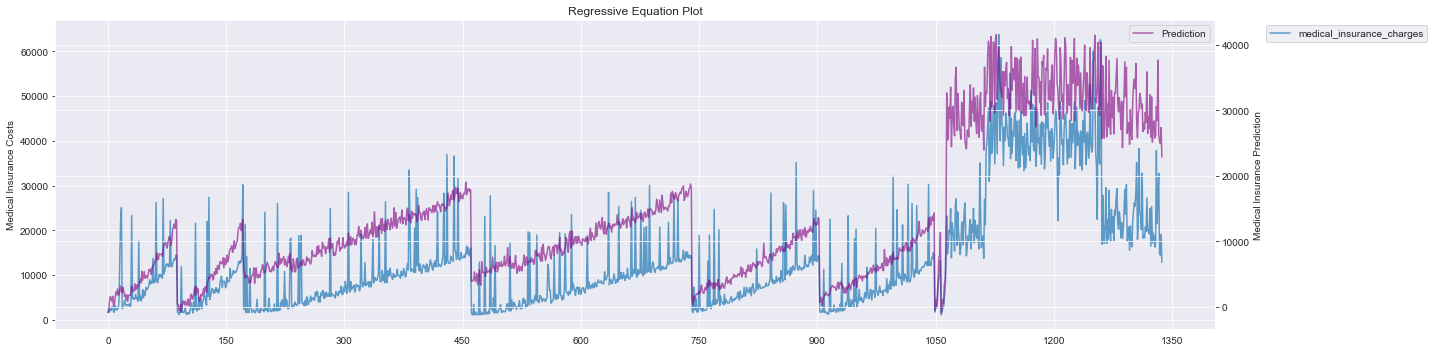

<h3> You've made it to the end of this challenging case study — well done! </h3>

You've learnt to perform a number of things in Python that you weren't familiar with previously.

You've been able to:

<li> Create Scatter Plots, Line Plots, Histograms, Bar Charts and Box Plots </li>
<li> Understand Descriptive Statistics from the .describe() functions </li>
<li> How to Detect and Remove Outliers from your Dataset </li>
<li> How to Subset and Filter your Dataframes </li>
<li> How to use Dual Axes to Plot Multiple Variables on different axes </li>
<li> How to interpret Correlation Coefficients and Heatmaps </li>
<li> How to convert Categorical Columns into Numerical Outputs </li>
<li> How to create and assess the goodness of fit for your Linear Regression Models </li>

Well done! This is just the start of your foundation in Python as you grow more proficient in practicing against datasets both big and small.

Keep up the fantastic work and as always - if you have any questions, don't hesitate to reach out to the community, your mentor, or #slack channel for extra support! If you need, you can also reach out to the course creator, Chris Hui, via: chris.hui.sb.1990@gmail.com! 

<h3> Keep up the amazing work! </h3>
